In [64]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [129]:
sp500 = yf.download("^gspc", "1990-01-02", "2022-10-11")     #2022-10-10
sp500

[*********************100%***********************]  1 of 1 completed


Open         High          Low        Close    Adj Close  \
Date                                                                          
1990-01-02   353.399994   359.690002   351.980011   359.690002   359.690002   
1990-01-03   359.690002   360.589996   357.890015   358.760010   358.760010   
1990-01-04   358.760010   358.760010   352.890015   355.670013   355.670013   
1990-01-05   355.670013   355.670013   351.350006   352.200012   352.200012   
1990-01-08   352.200012   354.239990   350.540009   353.790009   353.790009   
...                 ...          ...          ...          ...          ...   
2022-10-04  3726.459961  3791.919922  3726.459961  3790.929932  3790.929932   
2022-10-05  3753.250000  3806.909912  3722.659912  3783.280029  3783.280029   
2022-10-06  3771.969971  3797.929932  3739.219971  3744.520020  3744.520020   
2022-10-07  3706.739990  3706.739990  3620.729980  3639.659912  3639.659912   
2022-10-10  3647.510010  3652.169922  3588.100098  3612.389893  3612.389893   

                Volume  
Date                    
1990-01-02   162070000  
1990-01-03   192330000  
1990-01-04   177000000  
1990-01-05   158530000  
1990-01-08   140110000  
...                ...  
2022-10-04  5146580000  
2022-10-05  4293180000  
2022-10-06  4252100000  
2022-10-07  4449660000  
2022-10-10  3834320000  

[8258 rows x 6 columns]

# # STATISTICAL VALUES

In [66]:
mean = np.mean(sp500['Close'])
print(mean)

1486.147806536044


In [67]:
median = np.median(sp500["Close"])
print(median)

1245.8599853515625


In [68]:
sp500["Close"].describe()

count    8257.000000
mean     1486.147807
std       981.251312
min       295.459991
25%       876.770020
50%      1245.859985
75%      1922.030029
max      4796.560059
Name: Close, dtype: float64

In [69]:
from numpy import percentile

In [70]:
All_quartiles = percentile(sp500["Close"], [25, 50, 75])
Minimum, Maximum = sp500['Close'].min(), sp500['Close'].max()
print(Minimum)
print(All_quartiles[0])
print(All_quartiles[1])
print(All_quartiles[2])
print(Maximum)

295.4599914550781
876.77001953125
1245.8599853515625
1922.030029296875
4796.56005859375


In [71]:
from numpy import mean, absolute

In [72]:
Mean_deviation = mean(absolute(sp500['Close'] - mean(sp500['Close'])))
Mean_deviation

734.1164756625997

In [73]:
variance = np.var(sp500['Close']) #Variance
variance

962737.5258777192

In [74]:
std = np.std(sp500['Close'])   #Standard Deviation
std

981.1918904463689

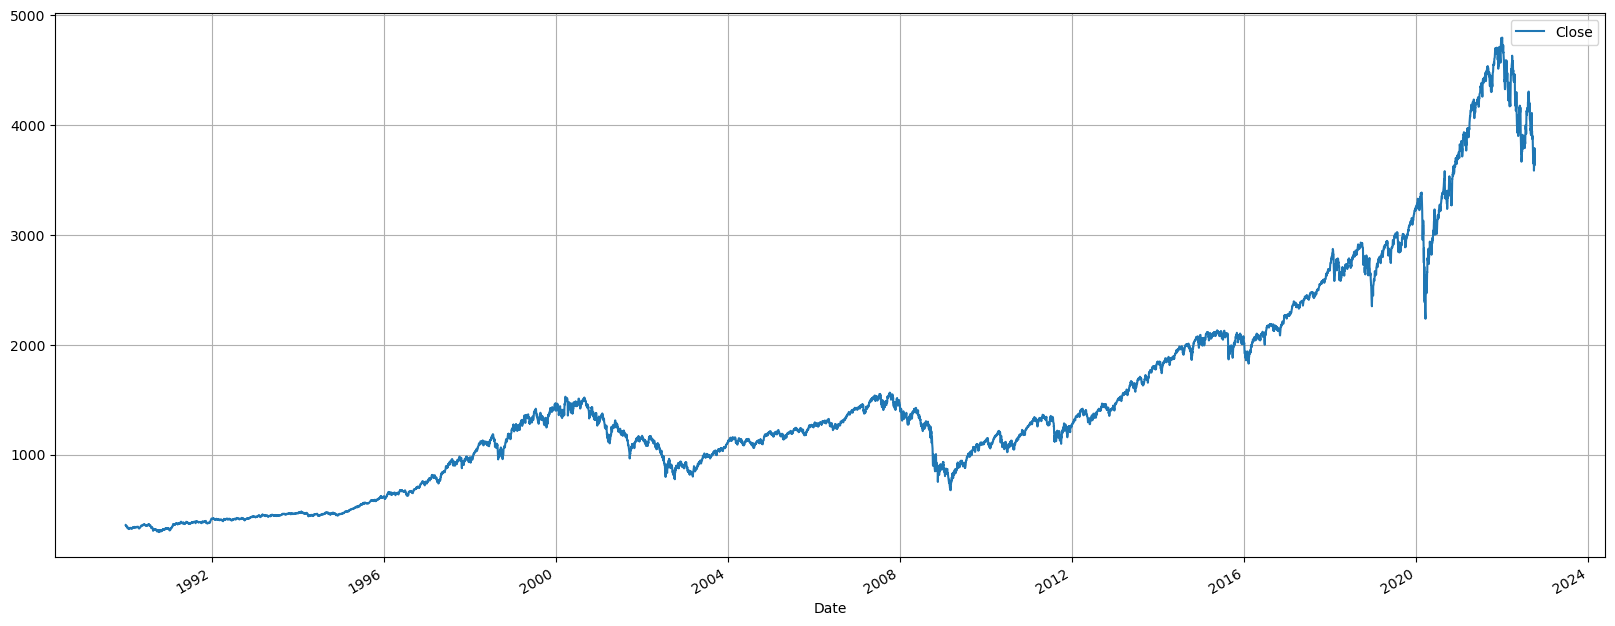

In [75]:
sp500['Close'].plot(figsize=(20,8))
#plt.axhline(y = mean + std, color = 'r', linestyle = '-')
plt.legend()
plt.grid()
plt.show()

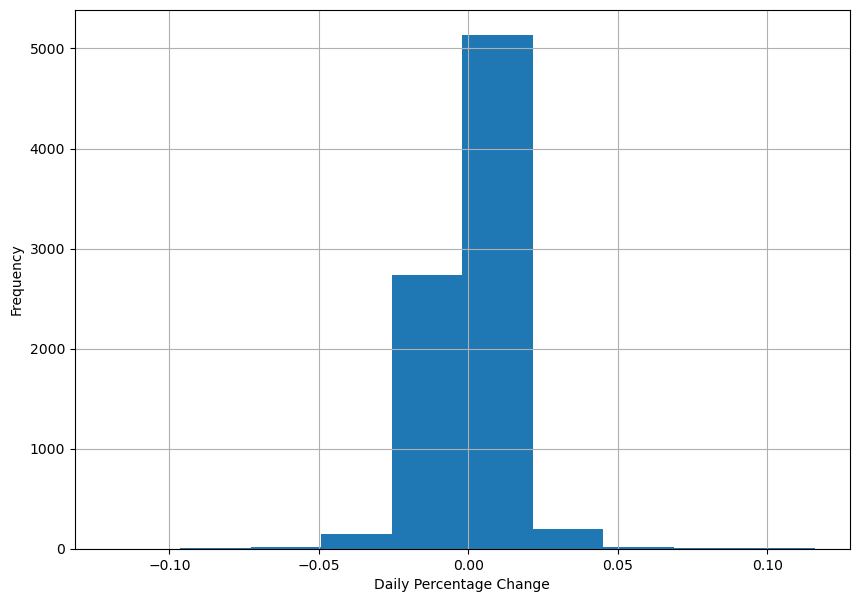

In [76]:
sp500['daily_percent_change'] = sp500['Close'].pct_change()
sp500.daily_percent_change.hist(figsize=(10,7))
plt.ylabel("Frequency")
plt.xlabel("Daily Percentage Change")
plt.show()

<AxesSubplot:title={'center':'Mean Log Returns by Calander Day of Month'}, xlabel='day_of_month'>

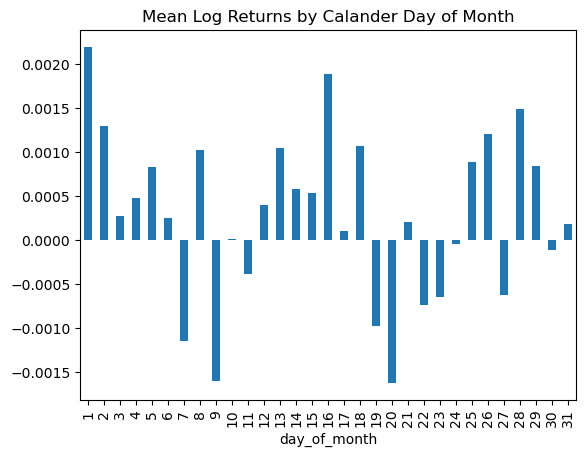

In [77]:
sp500["log_return"] = np.log(sp500["Close"] / sp500["Close"].shift(1))
sp500['day_of_month'] = sp500.index.day
sp500['Year'] = sp500.index.year
grouped_by_day = sp500.groupby("day_of_month").log_return.mean()
grouped_by_day.plot.bar(title="Mean Log Returns by Calander Day of Month")

In [78]:
import pandas as pd
import os
os.getcwd()
vix = pd.read_csv('^VIX.csv')

In [79]:
date_time = pd.to_datetime(vix["Date"])

In [80]:
vix["Date"] = date_time

In [81]:
vix.set_index(vix["Date"],inplace=True)

In [124]:
vix

Date       Open       High        Low      Close  Adj Close  \
Date                                                                           
1990-01-02 1990-01-02  17.240000  17.240000  17.240000  17.240000  17.240000   
1990-01-03 1990-01-03  18.190001  18.190001  18.190001  18.190001  18.190001   
1990-01-04 1990-01-04  19.219999  19.219999  19.219999  19.219999  19.219999   
1990-01-05 1990-01-05  20.110001  20.110001  20.110001  20.110001  20.110001   
1990-01-08 1990-01-08  20.260000  20.260000  20.260000  20.260000  20.260000   
...               ...        ...        ...        ...        ...        ...   
2022-10-04 2022-10-04  29.520000  29.620001  28.559999  29.070000  29.070000   
2022-10-05 2022-10-05  29.360001  30.110001  28.500000  28.549999  28.549999   
2022-10-06 2022-10-06  28.600000  30.740000  28.559999  30.520000  30.520000   
2022-10-07 2022-10-07  30.370001  32.020000  29.879999  31.360001  31.360001   
2022-10-10 2022-10-10  32.930000  33.990002  32.049999  32.450001  32.450001   

            Volume  daily_percent_change  
Date                                      
1990-01-02       0                   NaN  
1990-01-03       0              0.055104  
1990-01-04       0              0.056624  
1990-01-05       0              0.046306  
1990-01-08       0              0.007459  
...            ...                   ...  
2022-10-04       0             -0.034219  
2022-10-05       0             -0.017888  
2022-10-06       0              0.069002  
2022-10-07       0              0.027523  
2022-10-10       0              0.034758  

[8258 rows x 8 columns]

In [83]:
vix.tail()

Date       Open       High        Low      Close  Adj Close  \
Date                                                                           
2022-10-04 2022-10-04  29.520000  29.620001  28.559999  29.070000  29.070000   
2022-10-05 2022-10-05  29.360001  30.110001  28.500000  28.549999  28.549999   
2022-10-06 2022-10-06  28.600000  30.740000  28.559999  30.520000  30.520000   
2022-10-07 2022-10-07  30.370001  32.020000  29.879999  31.360001  31.360001   
2022-10-10 2022-10-10  32.930000  33.990002  32.049999  32.450001  32.450001   

            Volume  
Date                
2022-10-04       0  
2022-10-05       0  
2022-10-06       0  
2022-10-07       0  
2022-10-10       0

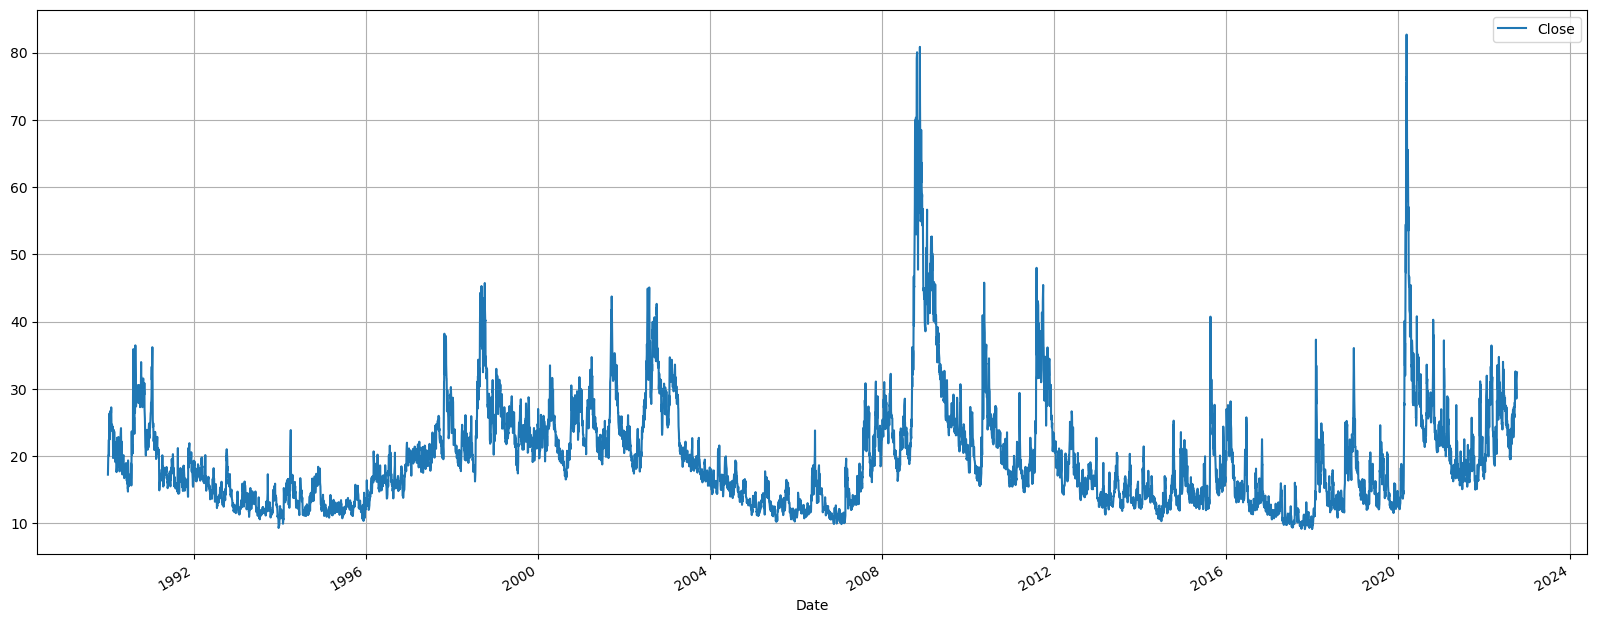

In [84]:
import matplotlib.pyplot as plt
vix['Close'].plot(figsize=(20,8))
#plt.axhline(y = mean + std, color = 'r', linestyle = '-')
plt.legend()
plt.grid()
plt.show()

<AxesSubplot:>

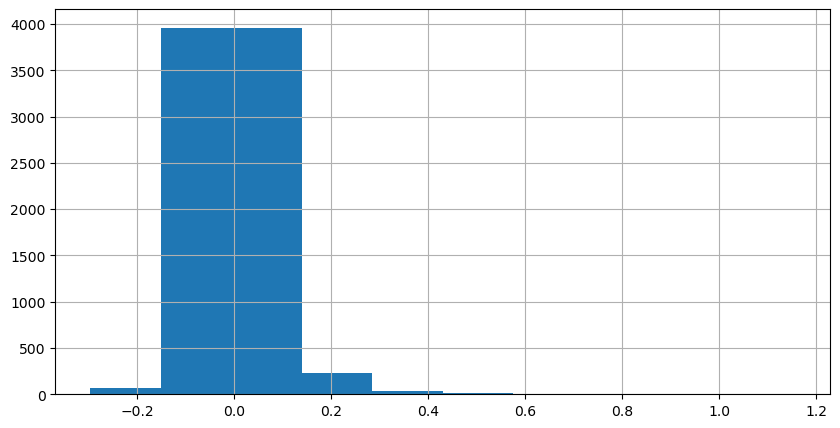

In [85]:
vix['daily_percent_change'] = vix["Close"].pct_change()
vix.daily_percent_change.hist(figsize=(10,5))

In [86]:
vix

Date       Open       High        Low      Close  Adj Close  \
Date                                                                           
1990-01-02 1990-01-02  17.240000  17.240000  17.240000  17.240000  17.240000   
1990-01-03 1990-01-03  18.190001  18.190001  18.190001  18.190001  18.190001   
1990-01-04 1990-01-04  19.219999  19.219999  19.219999  19.219999  19.219999   
1990-01-05 1990-01-05  20.110001  20.110001  20.110001  20.110001  20.110001   
1990-01-08 1990-01-08  20.260000  20.260000  20.260000  20.260000  20.260000   
...               ...        ...        ...        ...        ...        ...   
2022-10-04 2022-10-04  29.520000  29.620001  28.559999  29.070000  29.070000   
2022-10-05 2022-10-05  29.360001  30.110001  28.500000  28.549999  28.549999   
2022-10-06 2022-10-06  28.600000  30.740000  28.559999  30.520000  30.520000   
2022-10-07 2022-10-07  30.370001  32.020000  29.879999  31.360001  31.360001   
2022-10-10 2022-10-10  32.930000  33.990002  32.049999  32.450001  32.450001   

            Volume  daily_percent_change  
Date                                      
1990-01-02       0                   NaN  
1990-01-03       0              0.055104  
1990-01-04       0              0.056624  
1990-01-05       0              0.046306  
1990-01-08       0              0.007459  
...            ...                   ...  
2022-10-04       0             -0.034219  
2022-10-05       0             -0.017888  
2022-10-06       0              0.069002  
2022-10-07       0              0.027523  
2022-10-10       0              0.034758  

[8258 rows x 8 columns]

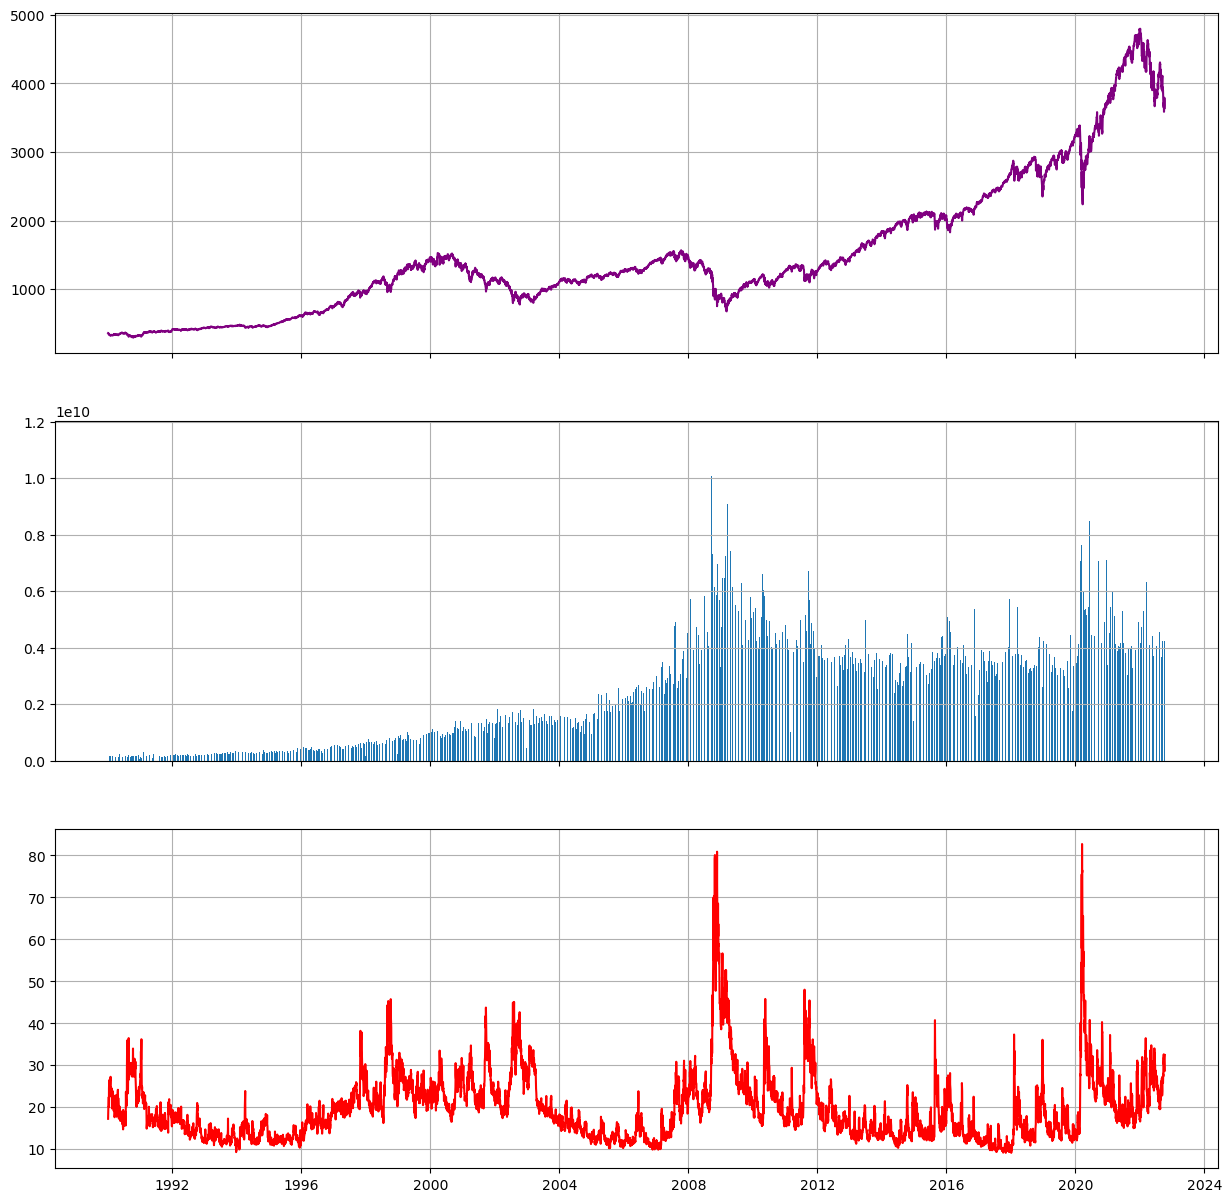

In [87]:
import pandas as pd
volume = sp500['Volume']     # Extracting volume from the dataframe 'data'
Close = sp500['Close']
Close2 = vix['Close']
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(15, 15)) #creating fig with two rows & one column
ax1.plot(Close, color='purple')    # Plotting close prices on the first sub-plot
ax1.grid(True)
ax2.bar(volume.index, volume)
ax2.grid(True)
ax3.plot(Close2, color='red')
ax3.grid(True)
plt.show()

In [95]:
import seaborn as sbn

C:\Users\gopi8\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Close'>

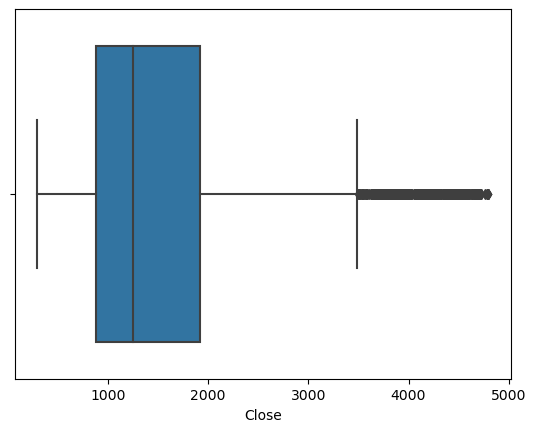

In [96]:
sbn.boxplot('Close', data=sp500)
#sbn.boxplot('Open', data=sp500)

In [97]:
q1 = sp500['Close'].quantile(0.25)
q3 = sp500['Close'].quantile(0.75)

#q1 = sp500['Open'].quantile(0.25)
#q3 = sp500['Open'].quantile(0.75)

In [98]:
iqr = q3-q1
#iqr1 = q3-q1

In [99]:
iqr
#iqr1

1045.260009765625

In [100]:
q4 = sp500['Close'].quantile(1.00)
q3 = sp500['Close'].quantile(0.75)

In [101]:
iqr1 = q4-q3

In [102]:
iqr1

2874.530029296875

In [103]:
spx = sp500[(sp500['Close']>=q1-1.5*iqr) & (sp500['Close']<=q3+1.5*iqr)]

In [104]:
spx

Open         High          Low        Close    Adj Close  \
Date                                                                          
1990-01-02   353.399994   359.690002   351.980011   359.690002   359.690002   
1990-01-03   359.690002   360.589996   357.890015   358.760010   358.760010   
1990-01-04   358.760010   358.760010   352.890015   355.670013   355.670013   
1990-01-05   355.670013   355.670013   351.350006   352.200012   352.200012   
1990-01-08   352.200012   354.239990   350.540009   353.790009   353.790009   
...                 ...          ...          ...          ...          ...   
2020-10-29  3277.169922  3341.050049  3259.820068  3310.110107  3310.110107   
2020-10-30  3293.590088  3304.929932  3233.939941  3269.959961  3269.959961   
2020-11-02  3296.199951  3330.139893  3279.739990  3310.239990  3310.239990   
2020-11-03  3336.250000  3389.489990  3336.250000  3369.159912  3369.159912   
2020-11-04  3406.459961  3486.250000  3405.169922  3443.439941  3443.439941   

                Volume  daily_percent_change  log_return  day_of_month  Year  
Date                                                                          
1990-01-02   162070000                   NaN         NaN             2  1990  
1990-01-03   192330000             -0.002586   -0.002589             3  1990  
1990-01-04   177000000             -0.008613   -0.008650             4  1990  
1990-01-05   158530000             -0.009756   -0.009804             5  1990  
1990-01-08   140110000              0.004514    0.004504             8  1990  
...                ...                   ...         ...           ...   ...  
2020-10-29  4911860000              0.011947    0.011877            29  2020  
2020-10-30  4843930000             -0.012130   -0.012204            30  2020  
2020-11-02  4314690000              0.012318    0.012243             2  2020  
2020-11-03  4241380000              0.017799    0.017643             3  2020  
2020-11-04  4790400000              0.022047    0.021808             4  2020  

[7767 rows x 10 columns]

C:\Users\gopi8\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Close'>

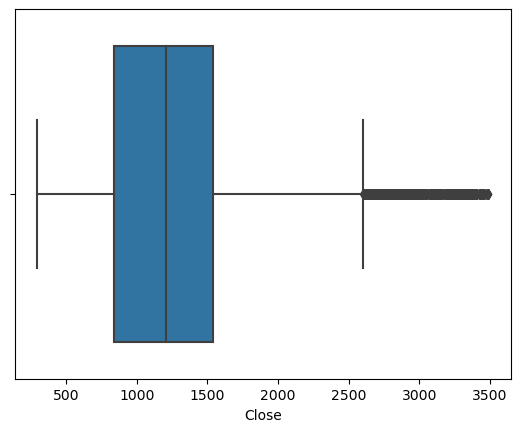

In [105]:
sbn.boxplot('Close', data=spx)

C:\Users\gopi8\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Close'>

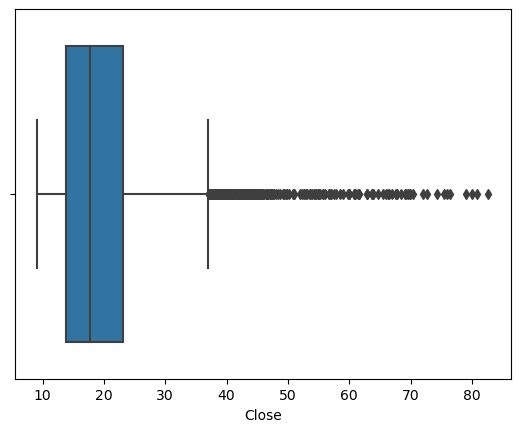

In [106]:
sbn.boxplot('Close', data=vix)

In [107]:
q1 = vix['Close'].quantile(0.25)
q3 = vix['Close'].quantile(0.75)

In [108]:
iqr1 = q3 - q1

In [109]:
iqr1

9.280000999999999

In [110]:
VIX = vix[(vix['Close']>=q1-1.5*iqr1) & (vix['Close']<=q3+1.5*iqr1)]

In [111]:
VIX

Date       Open       High        Low      Close  Adj Close  \
Date                                                                           
1990-01-02 1990-01-02  17.240000  17.240000  17.240000  17.240000  17.240000   
1990-01-03 1990-01-03  18.190001  18.190001  18.190001  18.190001  18.190001   
1990-01-04 1990-01-04  19.219999  19.219999  19.219999  19.219999  19.219999   
1990-01-05 1990-01-05  20.110001  20.110001  20.110001  20.110001  20.110001   
1990-01-08 1990-01-08  20.260000  20.260000  20.260000  20.260000  20.260000   
...               ...        ...        ...        ...        ...        ...   
2022-10-04 2022-10-04  29.520000  29.620001  28.559999  29.070000  29.070000   
2022-10-05 2022-10-05  29.360001  30.110001  28.500000  28.549999  28.549999   
2022-10-06 2022-10-06  28.600000  30.740000  28.559999  30.520000  30.520000   
2022-10-07 2022-10-07  30.370001  32.020000  29.879999  31.360001  31.360001   
2022-10-10 2022-10-10  32.930000  33.990002  32.049999  32.450001  32.450001   

            Volume  daily_percent_change  
Date                                      
1990-01-02       0                   NaN  
1990-01-03       0              0.055104  
1990-01-04       0              0.056624  
1990-01-05       0              0.046306  
1990-01-08       0              0.007459  
...            ...                   ...  
2022-10-04       0             -0.034219  
2022-10-05       0             -0.017888  
2022-10-06       0              0.069002  
2022-10-07       0              0.027523  
2022-10-10       0              0.034758  

[7987 rows x 8 columns]

C:\Users\gopi8\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Close'>

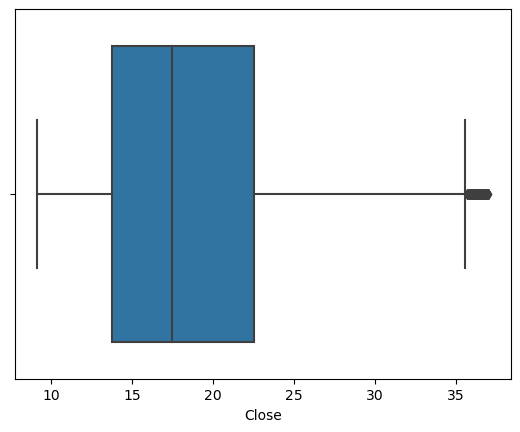

In [112]:
sbn.boxplot('Close', data=VIX)

In [113]:
VIX.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Close                   0
Adj Close               0
Volume                  0
daily_percent_change    1
dtype: int64

In [114]:
spx.isnull().sum()

Open                    0
High                    0
Low                     0
Close                   0
Adj Close               0
Volume                  0
daily_percent_change    1
log_return              1
day_of_month            0
Year                    0
dtype: int64

In [115]:
spx.drop('Adj Close', axis='columns', inplace=True)

C:\Users\gopi8\AppData\Local\Temp\ipykernel_15844\1329700055.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spx.drop('Adj Close', axis='columns', inplace=True)


In [116]:
spx

Open         High          Low        Close      Volume  \
Date                                                                         
1990-01-02   353.399994   359.690002   351.980011   359.690002   162070000   
1990-01-03   359.690002   360.589996   357.890015   358.760010   192330000   
1990-01-04   358.760010   358.760010   352.890015   355.670013   177000000   
1990-01-05   355.670013   355.670013   351.350006   352.200012   158530000   
1990-01-08   352.200012   354.239990   350.540009   353.790009   140110000   
...                 ...          ...          ...          ...         ...   
2020-10-29  3277.169922  3341.050049  3259.820068  3310.110107  4911860000   
2020-10-30  3293.590088  3304.929932  3233.939941  3269.959961  4843930000   
2020-11-02  3296.199951  3330.139893  3279.739990  3310.239990  4314690000   
2020-11-03  3336.250000  3389.489990  3336.250000  3369.159912  4241380000   
2020-11-04  3406.459961  3486.250000  3405.169922  3443.439941  4790400000   

            daily_percent_change  log_return  day_of_month  Year  
Date                                                              
1990-01-02                   NaN         NaN             2  1990  
1990-01-03             -0.002586   -0.002589             3  1990  
1990-01-04             -0.008613   -0.008650             4  1990  
1990-01-05             -0.009756   -0.009804             5  1990  
1990-01-08              0.004514    0.004504             8  1990  
...                          ...         ...           ...   ...  
2020-10-29              0.011947    0.011877            29  2020  
2020-10-30             -0.012130   -0.012204            30  2020  
2020-11-02              0.012318    0.012243             2  2020  
2020-11-03              0.017799    0.017643             3  2020  
2020-11-04              0.022047    0.021808             4  2020  

[7767 rows x 9 columns]

In [117]:
VIX.corr()

Open      High       Low     Close  Adj Close  \
Open                  1.000000  0.988212  0.991536  0.982963   0.982963   
High                  0.988212  1.000000  0.982272  0.990037   0.990037   
Low                   0.991536  0.982272  1.000000  0.990105   0.990105   
Close                 0.982963  0.990037  0.990105  1.000000   1.000000   
Adj Close             0.982963  0.990037  0.990105  1.000000   1.000000   
Volume                     NaN       NaN       NaN       NaN        NaN   
daily_percent_change -0.046624  0.034006  0.004364  0.086009   0.086009   

                      Volume  daily_percent_change  
Open                     NaN             -0.046624  
High                     NaN              0.034006  
Low                      NaN              0.004364  
Close                    NaN              0.086009  
Adj Close                NaN              0.086009  
Volume                   NaN                   NaN  
daily_percent_change     NaN              1.000000

In [118]:
VIX.drop('daily_percent_change', axis='columns', inplace=True)

C:\Users\gopi8\AppData\Local\Temp\ipykernel_15844\3669439532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  VIX.drop('daily_percent_change', axis='columns', inplace=True)


In [119]:
VIX

Date       Open       High        Low      Close  Adj Close  \
Date                                                                           
1990-01-02 1990-01-02  17.240000  17.240000  17.240000  17.240000  17.240000   
1990-01-03 1990-01-03  18.190001  18.190001  18.190001  18.190001  18.190001   
1990-01-04 1990-01-04  19.219999  19.219999  19.219999  19.219999  19.219999   
1990-01-05 1990-01-05  20.110001  20.110001  20.110001  20.110001  20.110001   
1990-01-08 1990-01-08  20.260000  20.260000  20.260000  20.260000  20.260000   
...               ...        ...        ...        ...        ...        ...   
2022-10-04 2022-10-04  29.520000  29.620001  28.559999  29.070000  29.070000   
2022-10-05 2022-10-05  29.360001  30.110001  28.500000  28.549999  28.549999   
2022-10-06 2022-10-06  28.600000  30.740000  28.559999  30.520000  30.520000   
2022-10-07 2022-10-07  30.370001  32.020000  29.879999  31.360001  31.360001   
2022-10-10 2022-10-10  32.930000  33.990002  32.049999  32.450001  32.450001   

            Volume  
Date                
1990-01-02       0  
1990-01-03       0  
1990-01-04       0  
1990-01-05       0  
1990-01-08       0  
...            ...  
2022-10-04       0  
2022-10-05       0  
2022-10-06       0  
2022-10-07       0  
2022-10-10       0  

[7987 rows x 7 columns]

In [130]:
X = sp500['Close']
X

Date
1990-01-02     359.690002
1990-01-03     358.760010
1990-01-04     355.670013
1990-01-05     352.200012
1990-01-08     353.790009
                 ...     
2022-10-04    3790.929932
2022-10-05    3783.280029
2022-10-06    3744.520020
2022-10-07    3639.659912
2022-10-10    3612.389893
Name: Close, Length: 8258, dtype: float64

In [131]:
Y = vix['Close']
Y

Date
1990-01-02    17.240000
1990-01-03    18.190001
1990-01-04    19.219999
1990-01-05    20.110001
1990-01-08    20.260000
                ...    
2022-10-04    29.070000
2022-10-05    28.549999
2022-10-06    30.520000
2022-10-07    31.360001
2022-10-10    32.450001
Name: Close, Length: 8258, dtype: float64

In [132]:
correlation = Y.corr(X)
correlation

-0.007507116306506465

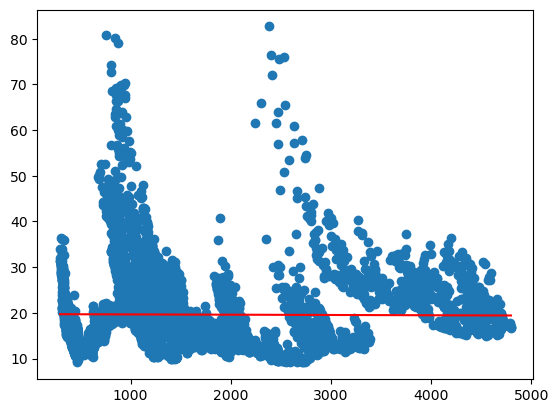

In [133]:
# plotting the data
plt.scatter(X, Y)
 
# This will fit the best line into the graph
plt.plot(np.unique(X), np.poly1d(np.polyfit(X, Y, 1))
         (np.unique(X)), color='red')

Text(0, 0.5, 'Y axis')

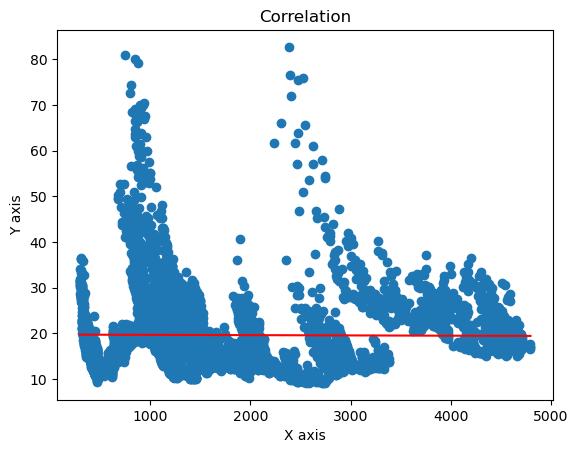

In [135]:
# adds the title
plt.title('Correlation')
 
# plot the data
plt.scatter(X, Y)
 
# fits the best fitting line to the data
plt.plot(np.unique(X),
         np.poly1d(np.polyfit(X, Y, 1))
         (np.unique(X)), color='red')
 
# Labelling axes
plt.xlabel('X axis')
plt.ylabel('Y axis')

In [137]:
sp500.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## APPLYING BB 

In [4]:
import numpy as np
import pandas as pd
#import pandas-datareader 
import matplotlib as plt


In [5]:
import yfinance as yf
import matplotlib.pyplot as plt

In [6]:
sp500 = yf.download("^gspc", "1990-01-02", "2022-10-10")

[*********************100%***********************]  1 of 1 completed


In [7]:
sp500

Open         High          Low        Close    Adj Close  \
Date                                                                          
1990-01-02   353.399994   359.690002   351.980011   359.690002   359.690002   
1990-01-03   359.690002   360.589996   357.890015   358.760010   358.760010   
1990-01-04   358.760010   358.760010   352.890015   355.670013   355.670013   
1990-01-05   355.670013   355.670013   351.350006   352.200012   352.200012   
1990-01-08   352.200012   354.239990   350.540009   353.790009   353.790009   
...                 ...          ...          ...          ...          ...   
2022-10-03  3609.780029  3698.350098  3604.929932  3678.429932  3678.429932   
2022-10-04  3726.459961  3791.919922  3726.459961  3790.929932  3790.929932   
2022-10-05  3753.250000  3806.909912  3722.659912  3783.280029  3783.280029   
2022-10-06  3771.969971  3797.929932  3739.219971  3744.520020  3744.520020   
2022-10-07  3706.739990  3706.739990  3620.729980  3639.659912  3639.659912   

                Volume  
Date                    
1990-01-02   162070000  
1990-01-03   192330000  
1990-01-04   177000000  
1990-01-05   158530000  
1990-01-08   140110000  
...                ...  
2022-10-03  4806680000  
2022-10-04  5146580000  
2022-10-05  4293180000  
2022-10-06  4252100000  
2022-10-07  4449660000  

[8257 rows x 6 columns]

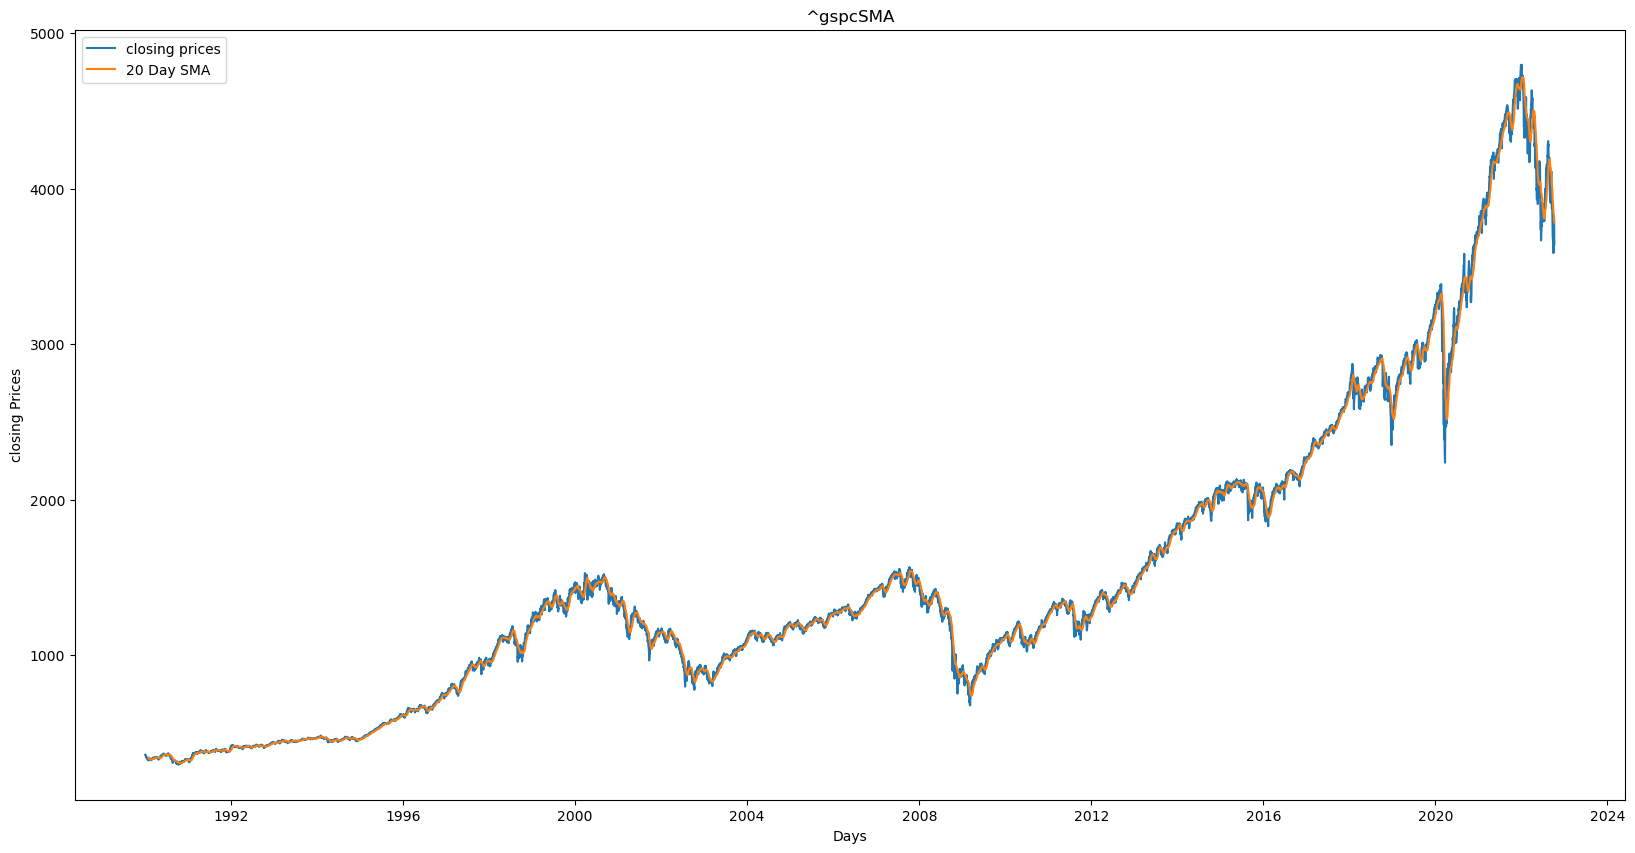

In [8]:
def get_sma(prices, rate):
    return prices.rolling(rate).mean()
symbol = '^gspc'
#sp500.index = np.arange(sp500.shape[0])
closing_prices = sp500['Close']

sma = get_sma(closing_prices, 20)

plt.figure(figsize=(20,10))
plt.title(symbol + 'SMA')
plt.xlabel('Days')
plt.ylabel('closing Prices')

plt.plot(closing_prices, label='closing prices')
plt.plot(sma, label='20 Day SMA')
plt.legend()
plt.show()


In [9]:
sp500

Open         High          Low        Close    Adj Close  \
Date                                                                          
1990-01-02   353.399994   359.690002   351.980011   359.690002   359.690002   
1990-01-03   359.690002   360.589996   357.890015   358.760010   358.760010   
1990-01-04   358.760010   358.760010   352.890015   355.670013   355.670013   
1990-01-05   355.670013   355.670013   351.350006   352.200012   352.200012   
1990-01-08   352.200012   354.239990   350.540009   353.790009   353.790009   
...                 ...          ...          ...          ...          ...   
2022-10-03  3609.780029  3698.350098  3604.929932  3678.429932  3678.429932   
2022-10-04  3726.459961  3791.919922  3726.459961  3790.929932  3790.929932   
2022-10-05  3753.250000  3806.909912  3722.659912  3783.280029  3783.280029   
2022-10-06  3771.969971  3797.929932  3739.219971  3744.520020  3744.520020   
2022-10-07  3706.739990  3706.739990  3620.729980  3639.659912  3639.659912   

                Volume  
Date                    
1990-01-02   162070000  
1990-01-03   192330000  
1990-01-04   177000000  
1990-01-05   158530000  
1990-01-08   140110000  
...                ...  
2022-10-03  4806680000  
2022-10-04  5146580000  
2022-10-05  4293180000  
2022-10-06  4252100000  
2022-10-07  4449660000  

[8257 rows x 6 columns]

In [10]:
def get_sma(prices, rate):
    return prices.rolling(rate).mean()
def get_bollinger_bands(prices, rate = 20):
    sma = get_sma(prices, rate)
    std = prices.rolling(rate).std()
    
symbol = '^gspc'
#sp500.index = np.arange(sp500.shape[0])
closing_prices = sp500['Adj Close']

get_bollinger_bands(closing_prices)


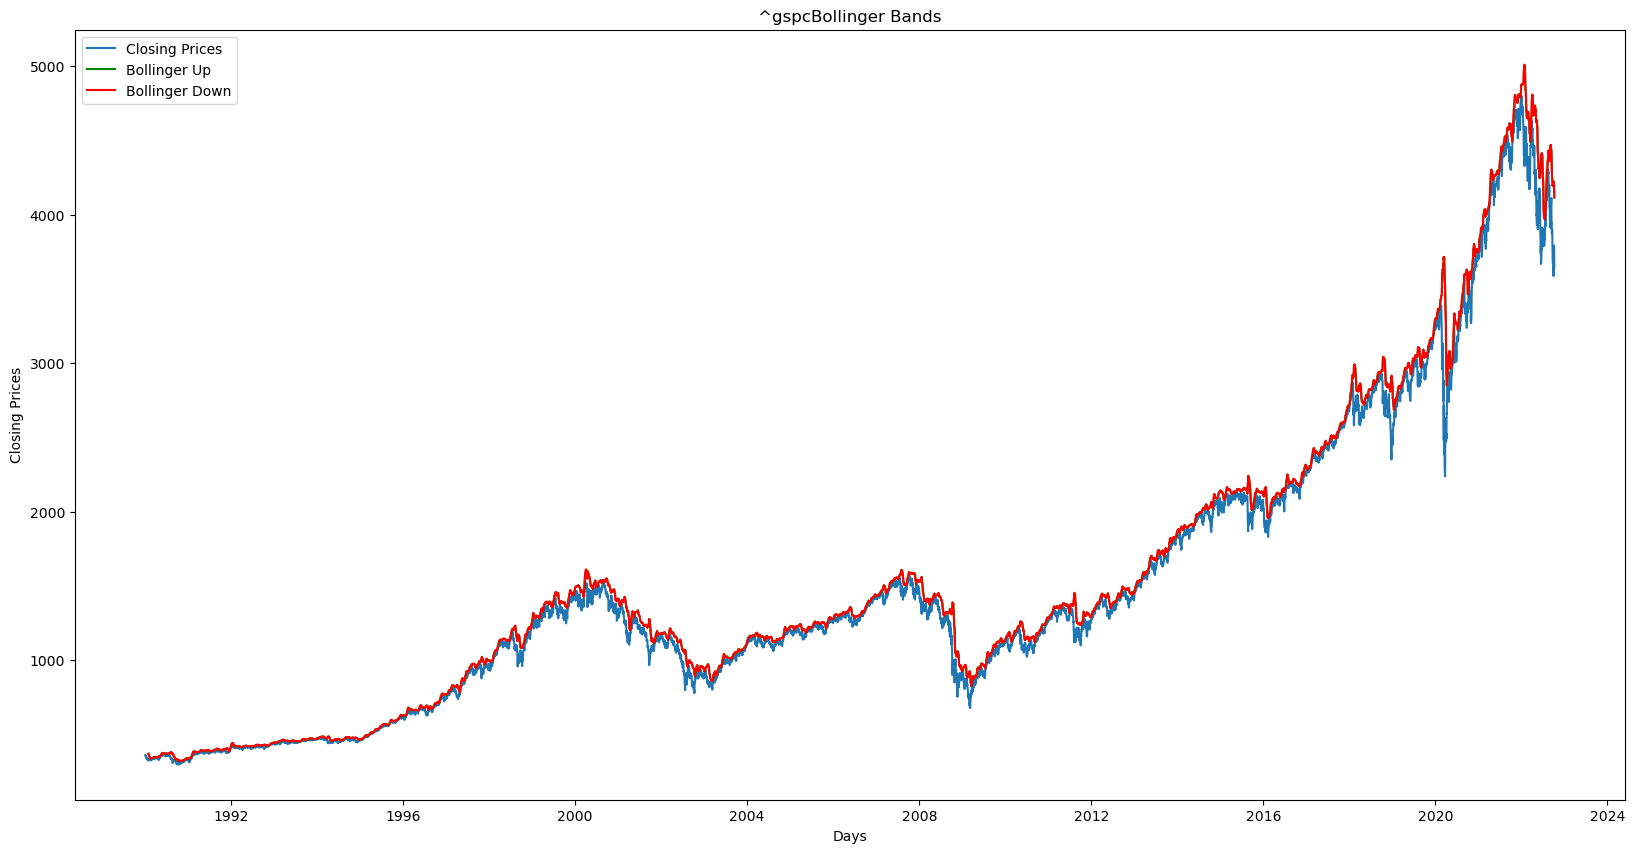

In [11]:
def get_sma(prices, rate):
    return prices.rolling(rate).mean()

def get_bollinger_bands(prices, rate = 20):
    sma = get_sma(prices, rate)
    std = prices.rolling(rate).std()
    bollinger_up = sma + std * 2.5 
    bollinger_down = sma + std * 2.5
    return bollinger_up, bollinger_down

symbol = '^gspc'
#sp500.index = np.arange(sp500.shape[0])
closing_prices = sp500["Close"]

bollinger_up, bollinger_down = get_bollinger_bands(closing_prices)

plt.figure(figsize=(20,10))
plt.title(symbol + 'Bollinger Bands')
plt.xlabel('Days')
plt.ylabel('Closing Prices')
plt.plot(closing_prices, label='Closing Prices')
plt.plot(bollinger_up, label='Bollinger Up', c='g')
plt.plot(bollinger_down, label='Bollinger Down', c='r')
plt.legend()
plt.show()

In [12]:
sma

Date
1990-01-02            NaN
1990-01-03            NaN
1990-01-04            NaN
1990-01-05            NaN
1990-01-08            NaN
                 ...     
2022-10-03    3832.412512
2022-10-04    3826.549512
2022-10-05    3816.720007
2022-10-06    3803.637012
2022-10-07    3782.252002
Name: Close, Length: 8257, dtype: float64

In [13]:
sp500=sp500[sp500.High!=sp500.Low]
#sp500.reset_index(inplace=True)
sp500.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
1990-01-02  353.399994  359.690002  351.980011  359.690002  359.690002   
1990-01-03  359.690002  360.589996  357.890015  358.760010  358.760010   
1990-01-04  358.760010  358.760010  352.890015  355.670013  355.670013   
1990-01-05  355.670013  355.670013  351.350006  352.200012  352.200012   
1990-01-08  352.200012  354.239990  350.540009  353.790009  353.790009   

               Volume  
Date                   
1990-01-02  162070000  
1990-01-03  192330000  
1990-01-04  177000000  
1990-01-05  158530000  
1990-01-08  140110000

In [14]:
import pandas as pd
import talib as ta

In [15]:
import pandas_ta as ta

In [16]:
sp500

Open         High          Low        Close    Adj Close  \
Date                                                                          
1990-01-02   353.399994   359.690002   351.980011   359.690002   359.690002   
1990-01-03   359.690002   360.589996   357.890015   358.760010   358.760010   
1990-01-04   358.760010   358.760010   352.890015   355.670013   355.670013   
1990-01-05   355.670013   355.670013   351.350006   352.200012   352.200012   
1990-01-08   352.200012   354.239990   350.540009   353.790009   353.790009   
...                 ...          ...          ...          ...          ...   
2022-10-03  3609.780029  3698.350098  3604.929932  3678.429932  3678.429932   
2022-10-04  3726.459961  3791.919922  3726.459961  3790.929932  3790.929932   
2022-10-05  3753.250000  3806.909912  3722.659912  3783.280029  3783.280029   
2022-10-06  3771.969971  3797.929932  3739.219971  3744.520020  3744.520020   
2022-10-07  3706.739990  3706.739990  3620.729980  3639.659912  3639.659912   

                Volume  
Date                    
1990-01-02   162070000  
1990-01-03   192330000  
1990-01-04   177000000  
1990-01-05   158530000  
1990-01-08   140110000  
...                ...  
2022-10-03  4806680000  
2022-10-04  5146580000  
2022-10-05  4293180000  
2022-10-06  4252100000  
2022-10-07  4449660000  

[8257 rows x 6 columns]

In [17]:

sp500['EMA']=ta.sma(sp500.Close, length=20)#sma ema
sp500['RSI']=ta.rsi(sp500.Close, length=2)
#sp500.ta.indicators()
#help(ta.bbands)
my_bbands = ta.bbands(sp500.Close, length=20, std=2.5)
my_bbands[0:50]
sp500=sp500.join(my_bbands)
sp500.dropna(inplace=True)
#sp500.reset_index(inplace=True)
sp500


Open         High          Low        Close    Adj Close  \
Date                                                                          
1990-01-29   325.799988   327.309998   321.790009   325.200012   325.200012   
1990-01-30   325.200012   325.730011   319.829987   322.980011   322.980011   
1990-01-31   322.980011   329.079987   322.980011   329.079987   329.079987   
1990-02-01   329.079987   329.859985   327.760010   328.790009   328.790009   
1990-02-02   328.790009   332.100006   328.089996   330.920013   330.920013   
...                 ...          ...          ...          ...          ...   
2022-10-03  3609.780029  3698.350098  3604.929932  3678.429932  3678.429932   
2022-10-04  3726.459961  3791.919922  3726.459961  3790.929932  3790.929932   
2022-10-05  3753.250000  3806.909912  3722.659912  3783.280029  3783.280029   
2022-10-06  3771.969971  3797.929932  3739.219971  3744.520020  3744.520020   
2022-10-07  3706.739990  3706.739990  3620.729980  3639.659912  3639.659912   

                Volume          EMA        RSI   BBL_20_2.5   BBM_20_2.5  \
Date                                                                       
1990-01-29   150770000   341.366000   4.490397   313.990218   341.366000   
1990-01-30   186030000   339.530501   1.555960   312.528872   339.530501   
1990-01-31   189660000   338.046500  78.558310   312.869157   338.046500   
1990-02-01   154580000   336.702499  73.120539   313.200883   336.702499   
1990-02-02   164400000   335.638499  86.672822   313.714871   335.638499   
...                ...          ...        ...          ...          ...   
2022-10-03  4806680000  3832.412512  66.893820  3456.822991  3832.412512   
2022-10-04  5146580000  3826.549512  86.641951  3452.924093  3826.549512   
2022-10-05  4293180000  3816.720007  80.140610  3453.083982  3816.720007   
2022-10-06  4252100000  3803.637012  45.524517  3454.963548  3803.637012   
2022-10-07  4449660000  3782.252002  13.641840  3457.624122  3782.252002   

             BBU_20_2.5  BBB_20_2.5  BBP_20_2.5  
Date                                             
1990-01-29   368.741783   16.038963    0.204739  
1990-01-30   366.532130   15.905274    0.193528  
1990-01-31   363.223843   14.895787    0.321933  
1990-02-01   360.204116   13.959871    0.331661  
1990-02-02   357.562127   13.063834    0.392388  
...                 ...         ...         ...  
2022-10-03  4208.002033   19.600683    0.295012  
2022-10-04  4200.174931   19.528059    0.452332  
2022-10-05  4180.356033   19.054897    0.454020  
2022-10-06  4152.310475   18.333688    0.415226  
2022-10-07  4106.879882   17.165851    0.280376  

[8238 rows x 13 columns]

In [18]:
def addemasignal(df, backcandles):
    emasignal = [0]*len(df)
    for row in range(backcandles, len(df)):
        upt = 1
        dnt = 1
        for i in range(row-backcandles, row+1):
            if df.High[i]>=df.EMA[i]:
                dnt=0
            if df.Low[i]<=df.EMA[i]:
                upt=0
        if upt==1 and dnt==1:
            #print("!!!!! check trend loop !!!!")
            emasignal[row]=3
        elif upt==1:
            emasignal[row]=2
        elif dnt==1:
            emasignal[row]=1
    df['EMASignal'] = emasignal

addemasignal(sp500, 6)

In [19]:
def addorderslimit(df, percent):
    ordersignal=[0]*len(df)
    for i in range(1, len(df)): #EMASignal of previous candle!!! modified!!!
        if df.EMASignal[i]==2 and df.Close[i]<=df['BBL_20_2.5'][i]:# and df.RSI[i]<=100: #Added RSI condition to avoid direct close condition
            ordersignal[i]=df.Close[i]-df.Close[i]*percent
        elif df.EMASignal[i]==1 and df.Close[i]>=df['BBU_20_2.5'][i]:# and df.RSI[i]>=0:
            ordersignal[i]=df.Close[i]+df.Close[i]*percent
    df['ordersignal']=ordersignal
    
addorderslimit(sp500, 0.00)

In [20]:
sp500[sp500.ordersignal!=0]

Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume, EMA, RSI, BBL_20_2.5, BBM_20_2.5, BBU_20_2.5, BBB_20_2.5, BBP_20_2.5, EMASignal, ordersignal]
Index: []

In [21]:
time_date = sp500[sp500.ordersignal!=0].index

In [22]:
sp500.reset_index(inplace=True)

In [23]:
import numpy as np
def pointposbreak(x):
    if x['ordersignal']!=0:
        return x['ordersignal']
    else:
        return np.nan
sp500['pointposbreak'] = sp500.apply(lambda row: pointposbreak(row), axis=1)

In [24]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime

dfpl = sp500[1000:1250].copy()
#dfpl=dfpl.drop(columns=['level_0'])#!!!!!!!!!!
#dfpl.reset_index(inplace=True)
fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['Open'],
                high=dfpl['High'],
                low=dfpl['Low'],
                close=dfpl['Close']),
                go.Scatter(x=dfpl.index, y=dfpl.EMA, line=dict(color='orange', width=2), name="EMA"),
                go.Scatter(x=dfpl.index, y=dfpl['BBL_20_2.5'], line=dict(color='blue', width=1), name="BBL_20_2.5"),
                go.Scatter(x=dfpl.index, y=dfpl['BBU_20_2.5'], line=dict(color='blue', width=1), name="BBU_20_2.5")])

fig.add_scatter(x=dfpl.index, y=dfpl['pointposbreak'], mode="markers",
                marker=dict(size=5, color="MediumPurple"),
                name="Signal")
fig.show()

In [24]:
dfpl = sp500[:].copy()
def SIGNAL():
    return dfpl.ordersignal

In [25]:
from backtesting import Strategy
from backtesting import Backtest

class MyStrat(Strategy):
    initsize = 0.99
    ordertime=[]
    def init(self):
        super().init()
        self.signal = self.I(SIGNAL)

    def next(self):
        super().next()
        
        for j in range(0, len(self.orders)):
            #print('!!!!!!!!!!!!!!!!!!!', self.data.index[-1])
            if self.data.index[-1]-self.ordertime[0]>5:#days max to fulfill the order!!!
                #print('----------------------')
                #print(self.orders)
                #print(self.ordertime)
                self.orders[0].cancel()
                self.ordertime.pop(0)   
            
        if len(self.trades)>0:
            #print(self.data.index[-1], self.trades)
            if self.data.index[-1]-self.trades[-1].entry_time>=10:
                self.trades[-1].close()
                #print(self.data.index[-1], self.trades[-1].entry_time)
            
            if self.trades[-1].is_long and self.data.RSI[-1]>=50:
                self.trades[-1].close()
            elif self.trades[-1].is_short and self.data.RSI[-1]<=50:
                self.trades[-1].close()
        
        if self.signal!=0 and len(self.trades)==0 and self.data.EMASignal==2:
            #Cancel previous orders
            for j in range(0, len(self.orders)):
                self.orders[0].cancel()
                self.ordertime.pop(0)
            #Add new replacement order
            self.buy(sl=self.signal/2, limit=self.signal, size=self.initsize)
            self.ordertime.append(self.data.index[-1])
        
        elif self.signal!=0 and len(self.trades)==0 and self.data.EMASignal==1:
            #Cancel previous orders
            for j in range(0, len(self.orders)):
                self.orders[0].cancel()
                self.ordertime.pop(0)
            #Add new replacement order
            self.sell(sl=self.signal*2, limit=self.signal, size=self.initsize)
            self.ordertime.append(self.data.index[-1])
        

bt = Backtest(dfpl, MyStrat, cash=10000, margin=1/10, commission=.00)
stat = bt.run()
#stat


C:\Users\gopi8\anaconda3\lib\site-packages\backtesting\_plotting.py:50: UserWarning:

Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.



Loading BokehJS ...

C:\Users\gopi8\AppData\Local\Temp\ipykernel_19168\362717905.py:53: UserWarning:

Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.



In [26]:
dfpl

Date         Open         High          Low        Close  \
0    1990-01-29   325.799988   327.309998   321.790009   325.200012   
1    1990-01-30   325.200012   325.730011   319.829987   322.980011   
2    1990-01-31   322.980011   329.079987   322.980011   329.079987   
3    1990-02-01   329.079987   329.859985   327.760010   328.790009   
4    1990-02-02   328.790009   332.100006   328.089996   330.920013   
...         ...          ...          ...          ...          ...   
8233 2022-10-03  3609.780029  3698.350098  3604.929932  3678.429932   
8234 2022-10-04  3726.459961  3791.919922  3726.459961  3790.929932   
8235 2022-10-05  3753.250000  3806.909912  3722.659912  3783.280029   
8236 2022-10-06  3771.969971  3797.929932  3739.219971  3744.520020   
8237 2022-10-07  3706.739990  3706.739990  3620.729980  3639.659912   

        Adj Close      Volume          EMA        RSI   BBL_20_2.5  \
0      325.200012   150770000   341.366000   4.490397   313.990218   
1      322.980011   186030000   339.530501   1.555960   312.528872   
2      329.079987   189660000   338.046500  78.558310   312.869157   
3      328.790009   154580000   336.702499  73.120539   313.200883   
4      330.920013   164400000   335.638499  86.672822   313.714871   
...           ...         ...          ...        ...          ...   
8233  3678.429932  4806680000  3832.412512  66.893820  3456.822991   
8234  3790.929932  5146580000  3826.549512  86.641951  3452.924093   
8235  3783.280029  4293180000  3816.720007  80.140610  3453.083982   
8236  3744.520020  4252100000  3803.637012  45.524517  3454.963548   
8237  3639.659912  4449660000  3782.252002  13.641840  3457.624122   

       BBM_20_2.5   BBU_20_2.5  BBB_20_2.5  BBP_20_2.5  EMASignal  \
0      341.366000   368.741783   16.038963    0.204739          0   
1      339.530501   366.532130   15.905274    0.193528          0   
2      338.046500   363.223843   14.895787    0.321933          0   
3      336.702499   360.204116   13.959871    0.331661          0   
4      335.638499   357.562127   13.063834    0.392388          0   
...           ...          ...         ...         ...        ...   
8233  3832.412512  4208.002033   19.600683    0.295012          1   
8234  3826.549512  4200.174931   19.528059    0.452332          1   
8235  3816.720007  4180.356033   19.054897    0.454020          1   
8236  3803.637012  4152.310475   18.333688    0.415226          1   
8237  3782.252002  4106.879882   17.165851    0.280376          1   

      ordersignal  pointposbreak  
0               0            NaN  
1               0            NaN  
2               0            NaN  
3               0            NaN  
4               0            NaN  
...           ...            ...  
8233            0            NaN  
8234            0            NaN  
8235            0            NaN  
8236            0            NaN  
8237            0            NaN  

[8238 rows x 17 columns]

In [27]:
dtim = pd.DataFrame()
dtim["Date"] = dfpl.iloc[stat._trades["EntryTime"]]["Date"]
dtim.reset_index(inplace=True)

In [28]:
bt.plot(show_legend=False)

Row(id='1221', ...)

In [29]:
stat._trades["Date"] = dtim["Date"]
stat._trades.set_index("Date", inplace=True)
stat._trades

Empty DataFrame
Columns: [Size, EntryBar, ExitBar, EntryPrice, ExitPrice, PnL, ReturnPct, EntryTime, ExitTime, Duration]
Index: []

In [30]:
time_date

DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)

In [31]:
import pandas as pd
sp500

Date         Open         High          Low        Close  \
0    1990-01-29   325.799988   327.309998   321.790009   325.200012   
1    1990-01-30   325.200012   325.730011   319.829987   322.980011   
2    1990-01-31   322.980011   329.079987   322.980011   329.079987   
3    1990-02-01   329.079987   329.859985   327.760010   328.790009   
4    1990-02-02   328.790009   332.100006   328.089996   330.920013   
...         ...          ...          ...          ...          ...   
8233 2022-10-03  3609.780029  3698.350098  3604.929932  3678.429932   
8234 2022-10-04  3726.459961  3791.919922  3726.459961  3790.929932   
8235 2022-10-05  3753.250000  3806.909912  3722.659912  3783.280029   
8236 2022-10-06  3771.969971  3797.929932  3739.219971  3744.520020   
8237 2022-10-07  3706.739990  3706.739990  3620.729980  3639.659912   

        Adj Close      Volume          EMA        RSI   BBL_20_2.5  \
0      325.200012   150770000   341.366000   4.490397   313.990218   
1      322.980011   186030000   339.530501   1.555960   312.528872   
2      329.079987   189660000   338.046500  78.558310   312.869157   
3      328.790009   154580000   336.702499  73.120539   313.200883   
4      330.920013   164400000   335.638499  86.672822   313.714871   
...           ...         ...          ...        ...          ...   
8233  3678.429932  4806680000  3832.412512  66.893820  3456.822991   
8234  3790.929932  5146580000  3826.549512  86.641951  3452.924093   
8235  3783.280029  4293180000  3816.720007  80.140610  3453.083982   
8236  3744.520020  4252100000  3803.637012  45.524517  3454.963548   
8237  3639.659912  4449660000  3782.252002  13.641840  3457.624122   

       BBM_20_2.5   BBU_20_2.5  BBB_20_2.5  BBP_20_2.5  EMASignal  \
0      341.366000   368.741783   16.038963    0.204739          0   
1      339.530501   366.532130   15.905274    0.193528          0   
2      338.046500   363.223843   14.895787    0.321933          0   
3      336.702499   360.204116   13.959871    0.331661          0   
4      335.638499   357.562127   13.063834    0.392388          0   
...           ...          ...         ...         ...        ...   
8233  3832.412512  4208.002033   19.600683    0.295012          1   
8234  3826.549512  4200.174931   19.528059    0.452332          1   
8235  3816.720007  4180.356033   19.054897    0.454020          1   
8236  3803.637012  4152.310475   18.333688    0.415226          1   
8237  3782.252002  4106.879882   17.165851    0.280376          1   

      ordersignal  pointposbreak  
0               0            NaN  
1               0            NaN  
2               0            NaN  
3               0            NaN  
4               0            NaN  
...           ...            ...  
8233            0            NaN  
8234            0            NaN  
8235            0            NaN  
8236            0            NaN  
8237            0            NaN  

[8238 rows x 17 columns]

In [32]:
sp500['pct'] = sp500['Close'].pct_change()  #pct means close price change than previous candle

In [33]:
sp500

Date         Open         High          Low        Close  \
0    1990-01-29   325.799988   327.309998   321.790009   325.200012   
1    1990-01-30   325.200012   325.730011   319.829987   322.980011   
2    1990-01-31   322.980011   329.079987   322.980011   329.079987   
3    1990-02-01   329.079987   329.859985   327.760010   328.790009   
4    1990-02-02   328.790009   332.100006   328.089996   330.920013   
...         ...          ...          ...          ...          ...   
8233 2022-10-03  3609.780029  3698.350098  3604.929932  3678.429932   
8234 2022-10-04  3726.459961  3791.919922  3726.459961  3790.929932   
8235 2022-10-05  3753.250000  3806.909912  3722.659912  3783.280029   
8236 2022-10-06  3771.969971  3797.929932  3739.219971  3744.520020   
8237 2022-10-07  3706.739990  3706.739990  3620.729980  3639.659912   

        Adj Close      Volume          EMA        RSI   BBL_20_2.5  \
0      325.200012   150770000   341.366000   4.490397   313.990218   
1      322.980011   186030000   339.530501   1.555960   312.528872   
2      329.079987   189660000   338.046500  78.558310   312.869157   
3      328.790009   154580000   336.702499  73.120539   313.200883   
4      330.920013   164400000   335.638499  86.672822   313.714871   
...           ...         ...          ...        ...          ...   
8233  3678.429932  4806680000  3832.412512  66.893820  3456.822991   
8234  3790.929932  5146580000  3826.549512  86.641951  3452.924093   
8235  3783.280029  4293180000  3816.720007  80.140610  3453.083982   
8236  3744.520020  4252100000  3803.637012  45.524517  3454.963548   
8237  3639.659912  4449660000  3782.252002  13.641840  3457.624122   

       BBM_20_2.5   BBU_20_2.5  BBB_20_2.5  BBP_20_2.5  EMASignal  \
0      341.366000   368.741783   16.038963    0.204739          0   
1      339.530501   366.532130   15.905274    0.193528          0   
2      338.046500   363.223843   14.895787    0.321933          0   
3      336.702499   360.204116   13.959871    0.331661          0   
4      335.638499   357.562127   13.063834    0.392388          0   
...           ...          ...         ...         ...        ...   
8233  3832.412512  4208.002033   19.600683    0.295012          1   
8234  3826.549512  4200.174931   19.528059    0.452332          1   
8235  3816.720007  4180.356033   19.054897    0.454020          1   
8236  3803.637012  4152.310475   18.333688    0.415226          1   
8237  3782.252002  4106.879882   17.165851    0.280376          1   

      ordersignal  pointposbreak       pct  
0               0            NaN       NaN  
1               0            NaN -0.006827  
2               0            NaN  0.018887  
3               0            NaN -0.000881  
4               0            NaN  0.006478  
...           ...            ...       ...  
8233            0            NaN  0.025884  
8234            0            NaN  0.030584  
8235            0            NaN -0.002018  
8236            0            NaN -0.010245  
8237            0            NaN -0.028004  

[8238 rows x 18 columns]

In [34]:
#sp500['YYYYMMDD'] = pd.to_datetime(sp500['Date'], format='%Y-%m-%d')
#sp500 = sp500.set_index('Date')

In [35]:
sp500['pct']


0            NaN
1      -0.006827
2       0.018887
3      -0.000881
4       0.006478
          ...   
8233    0.025884
8234    0.030584
8235   -0.002018
8236   -0.010245
8237   -0.028004
Name: pct, Length: 8238, dtype: float64

                           Strategy
-------------------------  ----------
Start Period               1990-01-02
End Period                 2022-10-06
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          941.04%
CAGR%                      7.41%
Sharpe                     0.48
Sortino                    0.68
Max Drawdown               -56.78%
Longest DD Days            2620
Volatility (ann.)          18.25%
Calmar                     0.13
Skew                       -0.2
Kurtosis                   10.53

Expected Daily %           0.03%
Expected Monthly %         0.6%
Expected Yearly %          7.36%
Kelly Criterion            4.69%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1.86%
Expected Shortfall (cVaR)  -1.86%

Payoff Ratio               0.95
Profit Factor              1.1
Common Sense Ratio         1.04
CPC Index                  0.56
Tail Ratio                 0.95
Outlier Win Ratio          4.21
Outlier Loss Ratio         4.

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2007-10-10  2009-03-09  2013-03-28  1996    -56.775388        -51.662781
2  2000-03-27  2002-10-09  2007-05-30  2620    -49.146948        -45.798254
3  2020-02-20  2020-03-23  2020-08-18   180    -33.924960        -29.532657
4  2022-01-04  2022-09-30  2022-10-06   275    -25.246008        -23.960297
5  1990-07-17  1990-10-11  1991-02-13   211    -19.918693        -18.980891

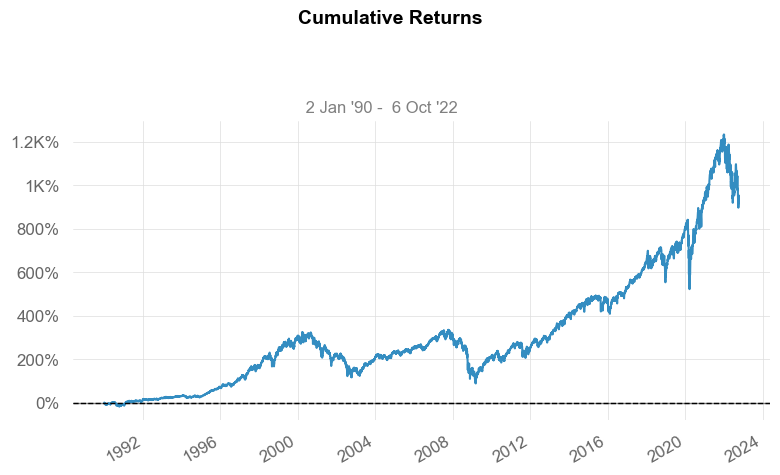

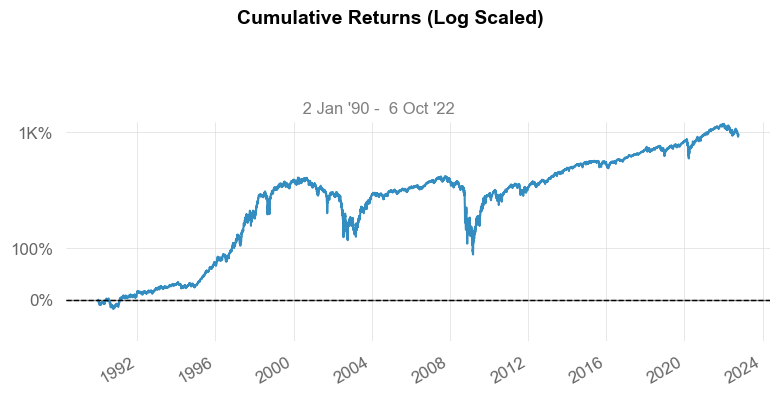

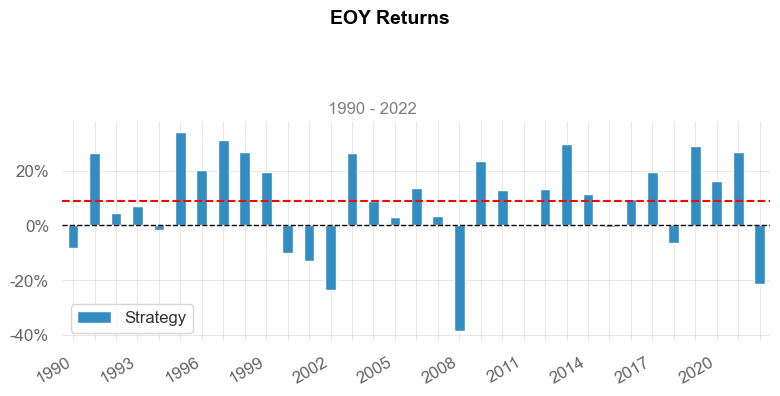

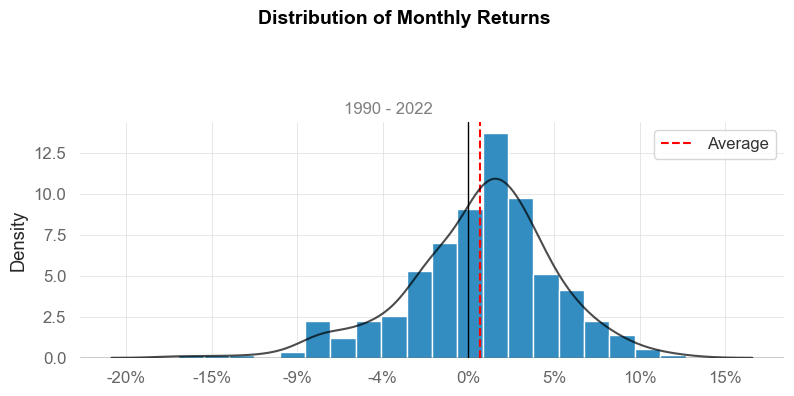

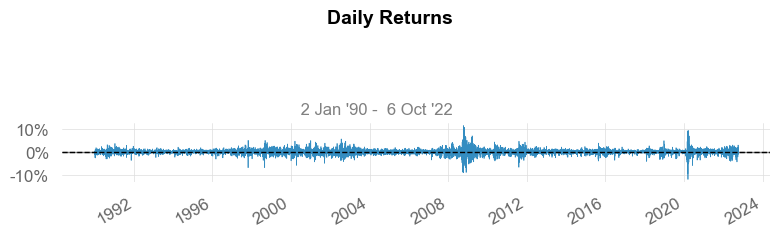

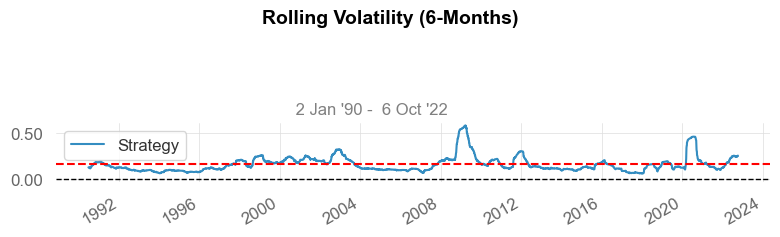

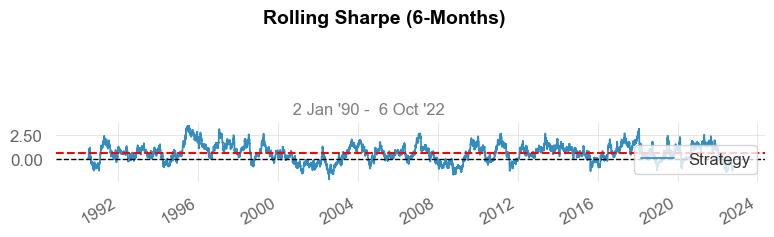

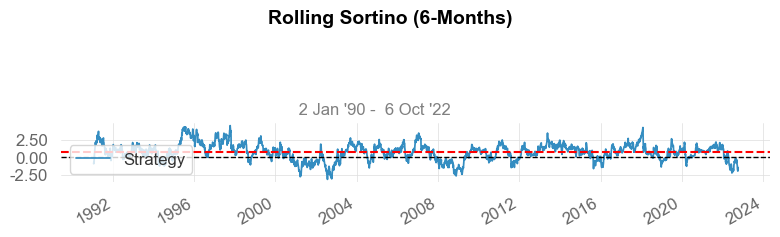

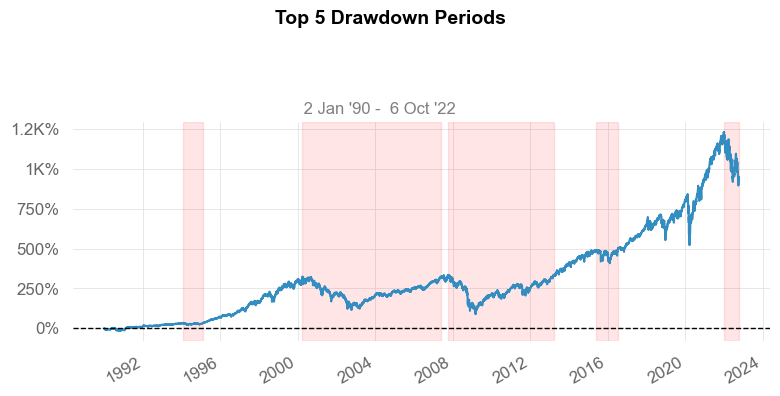

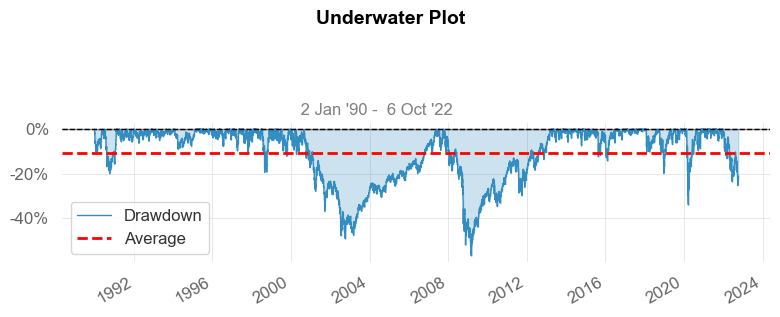

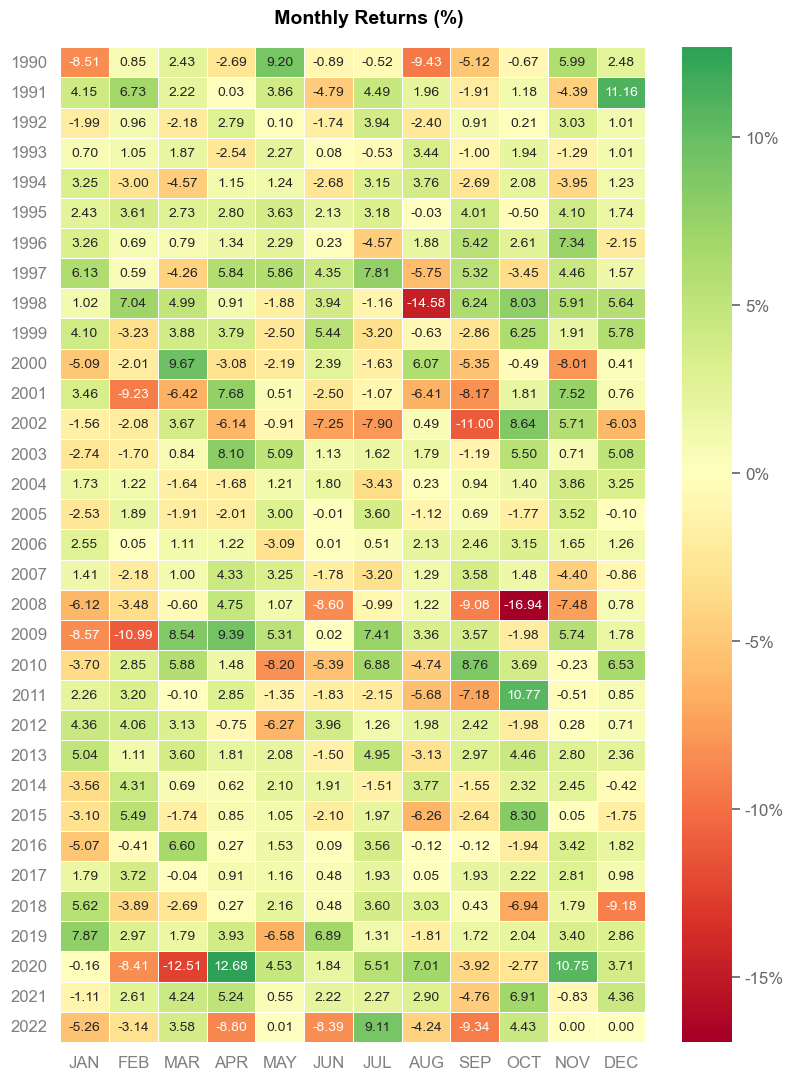

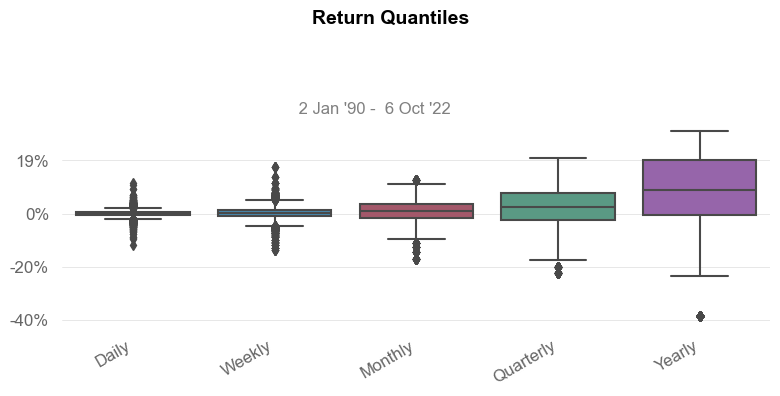

In [165]:
import pandas as pd
qs.reports.full(sp500['pct'])


In [166]:
%matplotlib inline
import quantstats as qs
qs.reports.html(sp500['pct'])

## ARCH MODEL

The ARCH model is a univariate model and based on historical asset returns. 
The ARCH(p) model has the following form:

The ARCH model for the variance of model yt is that conditional on yt-1 , the variance at time T.


In [166]:
import numpy as np
from scipy.stats import norm
import scipy.optimize as opt
import yfinance as yf
import pandas as pd
import datetime
import time
from arch import arch_model
import matplotlib.pyplot as plt
#from numba import jit
from sklearn.metrics import mean_squared_error as mse
import warnings
warnings.filterwarnings('ignore')

In [167]:
stocks = '^GSPC'
start = datetime.datetime(1990, 1, 1)
end = datetime.datetime(2022, 10, 11)
sp500 = yf.download(stocks, start=start, end = end, interval='1d')

[*********************100%***********************]  1 of 1 completed


In [168]:
ret = 100 * (sp500.pct_change()[1:]['Close']) 
realized_vol = ret.rolling(5).std()

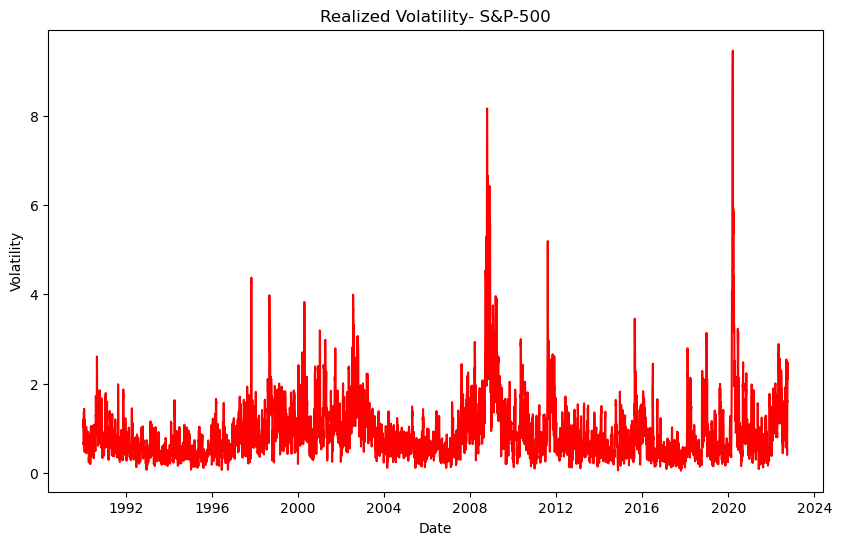

In [169]:
plt.figure(figsize=(10, 6))
plt.plot(realized_vol.index,realized_vol, color = 'red')
plt.title('Realized Volatility- S&P-500')
plt.ylabel('Volatility')
plt.xlabel('Date')
plt.show()

The most striking observation is the spikes around the COVID-19 pandemic.
some large movements, and, unsurprisingly, these ups and downs happen around important events such as the COVID-19 pandemic in mid-2020.

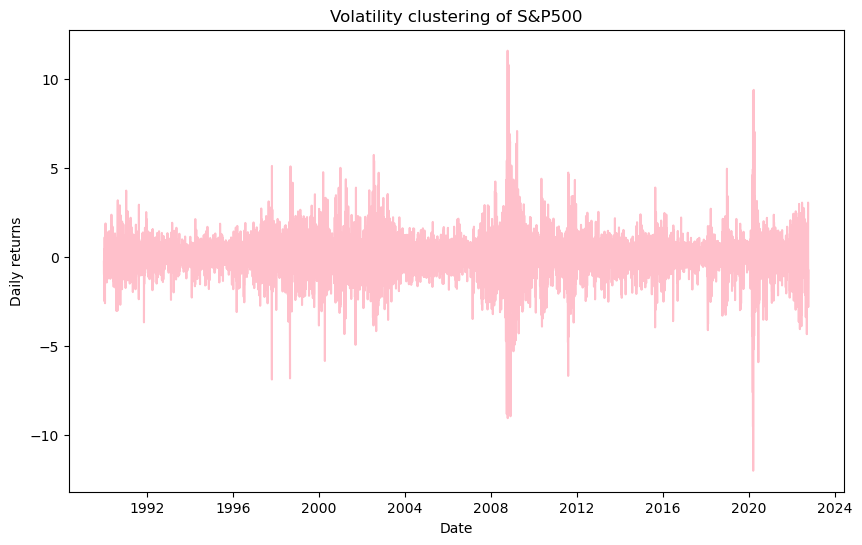

In [170]:
retv = ret.values 

plt.figure(figsize=(10, 6))
plt.plot(sp500.index[1:], ret, color = 'pink')
plt.title('Volatility clustering of S&P500')
plt.ylabel('Daily returns')
plt.xlabel('Date')
plt.show()

In [67]:
 n = 252
split_date = ret.iloc[-n:].index  #Spliting the Data

Kurtosis is a measure of the tailedness of a distribution. Tailedness is how often outliers occur. Excess kurtosis is the tailedness of a distribution relative to a normal distribution. Distributions with medium kurtosis (medium tails) are mesokurtic. Distributions with low kurtosis (thin tails) are platykurtic

In [68]:
sgm2 = ret.var()     # Calculating the Variance of SP500
K = ret.kurtosis()   # Calculating the Kurtosis of SP500
alpha = (-3.0 * sgm2 + np.sqrt(9.0 * sgm2 ** 2 - 12.0 *(3.0 * sgm2 - K) * K)) / (6 * K) # Finding the  initial value for slope coefficient
omega = (1 - alpha) * sgm2 # Finding the Intital Value for constant term
initial_parameters = [alpha, omega]
omega, alpha

(0.7961481357791422, 0.39738128323409505)

In [69]:
def arch_likelihood(initial_parameters, retv):
    omega = abs(initial_parameters[0]) 
    alpha = abs(initial_parameters[1]) 
    T = len(retv)
    logliks = 0
    sigma2 = np.zeros(T)
    sigma2[0] = np.var(retv) 
    for t in range(1, T):
        sigma2[t] = omega + alpha * (retv[t - 1]) ** 2 
    logliks = np.sum(0.5 * (np.log(sigma2)+retv ** 2 / sigma2)) 
    return logliks

In [70]:
logliks = arch_likelihood(initial_parameters, retv)
logliks

5323.627803758001

In [71]:
def opt_params(x0, retv):
    opt_result = opt.minimize(arch_likelihood, x0=x0, args = (retv), method='Nelder-Mead', options={'maxiter': 5000}) 
    params = opt_result.x 
    print('\nResults of Nelder-Mead minimization\n{}\n{}'.format(''.join(['-'] * 28), opt_result))
    print('\nResulting params = {}'.format(params))
    return params

In [72]:
params = opt_params(initial_parameters, retv)  #Results of Nelder-Mead minimization


Results of Nelder-Mead minimization
----------------------------
 final_simplex: (array([[0.85903174, 0.37339514],
       [0.85901442, 0.37347033],
       [0.85897492, 0.37346762]]), array([4693.98984168, 4693.98984558, 4693.98984729]))
           fun: 4693.9898416783435
       message: 'Optimization terminated successfully.'
          nfev: 74
           nit: 39
        status: 0
       success: True
             x: array([0.85903174, 0.37339514])

Resulting params = [0.85903174 0.37339514]


In [73]:
def arch_apply(ret):
    omega = params[0]
    alpha = params[1]
    T = len(ret)
    sigma2_arch = np.zeros(T + 1)
    sigma2_arch[0] = np.var(ret)
    for t in range(1, T):
        sigma2_arch[t] = omega + alpha * ret[t - 1] ** 2
    return sigma2_arch

sigma2_arch = arch_apply(ret)

In [74]:
arch = arch_model(ret, mean='zero', vol='ARCH', p=1).fit(disp='off')
print(arch.summary())

                        Zero Mean - ARCH Model Results                        
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -12279.8
Distribution:                  Normal   AIC:                           24563.6
Method:            Maximum Likelihood   BIC:                           24577.6
                                        No. Observations:                 8255
Date:                Mon, Dec 19 2022   Df Residuals:                     8255
Time:                        01:50:53   Df Model:                            0
                            Volatility Model                            
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.8590  3.642e-02     23.588 5.065e-123 [  0.788,  0.93

In [75]:
bic_arch = []      #Iterating ARCH parameter p over specified interval
for p in range(1, 5): 
    arch = arch_model(ret, mean='zero', vol='ARCH', p=p)\
                         .fit(disp='off') 
    bic_arch.append(arch.bic)
    if arch.bic == np.min(bic_arch): 
        best_param = p
arch = arch_model(ret, mean='zero', vol='ARCH', p=best_param)\
                 .fit(disp='off') 
print(arch.summary())
forecast = arch.forecast(start=split_date[0])     #Forecasting the volatility based on the optimized ARCH model
forecast_arch = forecast

                        Zero Mean - ARCH Model Results                        
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -11287.1
Distribution:                  Normal   AIC:                           22584.1
Method:            Maximum Likelihood   BIC:                           22619.2
                                        No. Observations:                 8255
Date:                Mon, Dec 19 2022   Df Residuals:                     8255
Time:                        01:50:54   Df Model:                            0
                             Volatility Model                             
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.3321  1.874e-02     17.719  2.985e-70   [  0.29

In [76]:
rmse_arch = np.sqrt(mse(realized_vol[-n:] / 100,                   #Calculating the root mean square error (RMSE) score
                                 np.sqrt(forecast_arch\
                                 .variance.iloc[-len(split_date):]
                                 / 100))) 
print('The RMSE value of ARCH model is {:.4f}'.format(rmse_arch))

The RMSE value of ARCH model is 0.1216


RMSE values between 0.2 and 0.5 shows that the model can relatively predict the data accurately. In addition, Adjusted R-squared more than 0.75 is a very good value for showing the accuracy

RMSE could be more that 1. that's just mean that your model couldn't find a solution or (optimized very well). It means that the squared root of squared differences between your predictions and observed values is 11. Naturally lower values indicate a better fit of your model

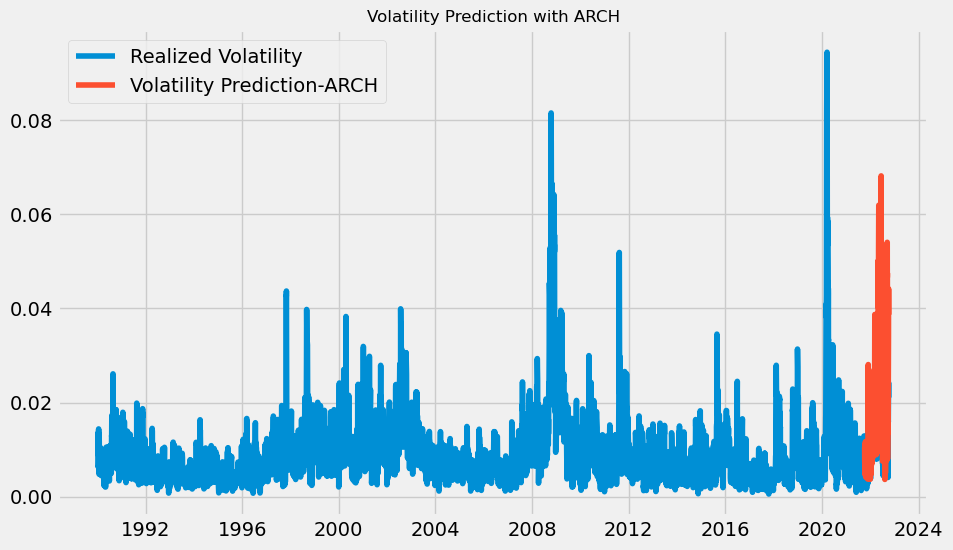

In [77]:
plt.figure(figsize=(10, 6))
plt.plot(realized_vol / 100, label='Realized Volatility')
plt.plot(forecast_arch.variance.iloc[-len(split_date):] / 100,
    label='Volatility Prediction-ARCH')
plt.title('Volatility Prediction with ARCH', fontsize=12)
plt.legend()
plt.show()

## LINEAR REGRESSION

In [2]:
# Let's start with calling all dependencies that we will use for this exercise 
import pandas as pd
import numpy as np
import math 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
import yfinance as yf  # We will use this library to upload latest data from Yahoo API
%matplotlib inline
plt.style.use('fivethirtyeight')

In [8]:
# define the ticker you will use
sp500
#Display stock information, it will give you a summary description of the ticker
#sp500.info

Open         High          Low        Close    Adj Close  \
Date                                                                          
1990-01-02   353.399994   359.690002   351.980011   359.690002   359.690002   
1990-01-03   359.690002   360.589996   357.890015   358.760010   358.760010   
1990-01-04   358.760010   358.760010   352.890015   355.670013   355.670013   
1990-01-05   355.670013   355.670013   351.350006   352.200012   352.200012   
1990-01-08   352.200012   354.239990   350.540009   353.790009   353.790009   
...                 ...          ...          ...          ...          ...   
2022-10-03  3609.780029  3698.350098  3604.929932  3678.429932  3678.429932   
2022-10-04  3726.459961  3791.919922  3726.459961  3790.929932  3790.929932   
2022-10-05  3753.250000  3806.909912  3722.659912  3783.280029  3783.280029   
2022-10-06  3771.969971  3797.929932  3739.219971  3744.520020  3744.520020   
2022-10-07  3706.739990  3706.739990  3620.729980  3639.659912  3639.659912   

                Volume  
Date                    
1990-01-02   162070000  
1990-01-03   192330000  
1990-01-04   177000000  
1990-01-05   158530000  
1990-01-08   140110000  
...                ...  
2022-10-03  4806680000  
2022-10-04  5146580000  
2022-10-05  4293180000  
2022-10-06  4252100000  
2022-10-07  4449660000  

[8257 rows x 6 columns]

In [9]:
x = sp500.index
y = sp500['Close']
y

Date
1990-01-02     359.690002
1990-01-03     358.760010
1990-01-04     355.670013
1990-01-05     352.200012
1990-01-08     353.790009
                 ...     
2022-10-03    3678.429932
2022-10-04    3790.929932
2022-10-05    3783.280029
2022-10-06    3744.520020
2022-10-07    3639.659912
Name: Close, Length: 8257, dtype: float64

In [10]:
# Data Exploration
# i like to set up a plot function so i can reuse it at later stages of this analysis 
def sp500_plot(data, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

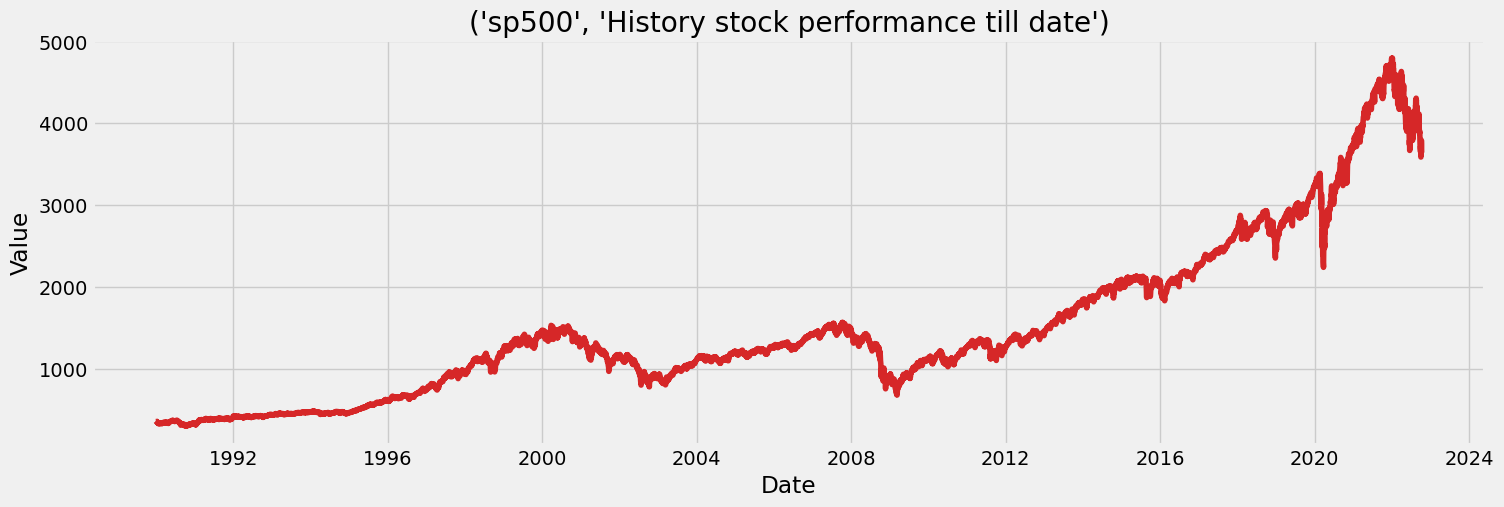

In [11]:
stock_name= "sp500"
title = (stock_name,"History stock performance till date")
sp500_plot(sp500 , x , y , title=title,xlabel='Date', ylabel='Value',dpi=100)

In [12]:
# Data Processing and scaling
sp500.reset_index(inplace=True) # to reset index and convert it to column

In [13]:
sp500.head()

Date        Open        High         Low       Close   Adj Close  \
0 1990-01-02  353.399994  359.690002  351.980011  359.690002  359.690002   
1 1990-01-03  359.690002  360.589996  357.890015  358.760010  358.760010   
2 1990-01-04  358.760010  358.760010  352.890015  355.670013  355.670013   
3 1990-01-05  355.670013  355.670013  351.350006  352.200012  352.200012   
4 1990-01-08  352.200012  354.239990  350.540009  353.790009  353.790009   

      Volume  
0  162070000  
1  192330000  
2  177000000  
3  158530000  
4  140110000

In [14]:
sp500.drop(columns=['Close']).head(2) # We are dropping un necessary columns from the set

Date        Open        High         Low   Adj Close     Volume
0 1990-01-02  353.399994  359.690002  351.980011  359.690002  162070000
1 1990-01-03  359.690002  360.589996  357.890015  358.760010  192330000

In [15]:
sp500['Date'] = pd.to_datetime(sp500.Date)

In [16]:
sp500.describe()

Open         High          Low        Close    Adj Close  \
count  8257.000000  8257.000000  8257.000000  8257.000000  8257.000000   
mean   1485.902332  1494.704280  1476.393485  1486.147807  1486.147807   
std     981.283777   986.511030   975.433013   981.251312   981.251312   
min     295.450012   301.450012   294.510010   295.459991   295.459991   
25%     876.770020   887.340027   865.150024   876.770020   876.770020   
50%    1245.939941  1255.890015  1236.380005  1245.859985  1245.859985   
75%    1923.060059  1935.650024  1907.300049  1922.030029  1922.030029   
max    4804.509766  4818.620117  4780.040039  4796.560059  4796.560059   

             Volume  
count  8.257000e+03  
mean   2.398856e+09  
std    1.850004e+09  
min    1.499000e+07  
25%    5.978000e+08  
50%    2.273430e+09  
75%    3.774680e+09  
max    1.145623e+10

In [17]:
print(len(sp500))

8257


In [27]:
#x = sp500[['Volume']]
#y = sp500['Close']

In [42]:
x = sp500[['Open', 'High','Low', 'Volume']]
y = sp500['Close']

#Data Split

For this data, I’ve split the data into training and test datasets with a test size of 15% of the total dataset. Afterward, we can simply check if the data was split successfully by using the shape() method

In [43]:
# Linear regression Model for stock prediction 
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.15 , shuffle=False,random_state = 0)

In [44]:
# let's check if total observation makes sense
print(train_x.shape )
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(7018, 4)
(1239, 4)
(7018,)
(1239,)


# Regression algorithm model implementation

Linear regression

Linear regression is a supervised learning algorithm , where it predict a depended variable or a target based on the given independent variables, so basically you find the relationship between a dependent variable and independent variables.

Y = mX + b,
where Y is the response (dependent) variable, X is the predictor (independent) variable, m is the estimated slope, and b is the estimated intercept

As per our project rule above all graphs shown Volume is the Depedent variable of Volatality where as Volataility is Independent variable. So Every Stocks Prices dependents upon the Volume of that share Price. So Now For this Volume is Independent Variable

X = Volume
Y = Close

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regression = LinearRegression()
regression.fit(train_x, train_y)
print("regression coefficient",regression.coef_)
print("regression intercept",regression.intercept_)

regression coefficient [-6.66900419e-01  8.85392442e-01  7.81505411e-01 -8.72916660e-12]
regression intercept -0.05228108655887809


#Prediction and Estimation

The coefficient of determination R²
Here we will compute the coefficient of determination denoted by R², which takes values between 0 and 1, the higher the value R² the more successful the linear regression is at explaining the variation of Y values, in our case the Y values represent the close stock prices of the subjected company. The below is the math behind The coefficient of determination R²

In [46]:
# the coefficient of determination R² 
regression_confidence = regression.score(test_x, test_y)
print("linear regression confidence: ", regression_confidence)

linear regression confidence:  0.9995461001752345


The coefficient of determination R² for our data is at 0.99 which’s 99%, which means that our model is a linear model that explains the variation of all Y values.

The predicted list of data points from open, high, low, and vol are not sorted based on time or date, at this point It’s not important to sort these data point, as we will plot is based on their associated dates using scatter plot() method.

In [47]:
predicted=regression.predict(test_x)
print(test_x.head())

             Open         High          Low      Volume
7018  2587.469971  2593.379883  2585.659912  3541970000
7019  2592.110107  2597.020020  2584.350098  3815190000
7020  2588.709961  2595.469971  2585.020020  3898450000
7021  2584.000000  2586.500000  2566.330078  3844100000
7022  2580.179932  2583.810059  2575.570068  3489740000


In [48]:
predicted.shape

(1239,)

Prediction Table of Actual Prices vs Predicted values

In [49]:
Psp=pd.DataFrame({'Actual_Price':test_y, 'Predicted_Price':predicted})
Psp.head(10)

Actual_Price  Predicted_Price
7018   2591.129883      2591.198153
7019   2590.639893      2590.300581
7020   2594.379883      2591.718560
7021   2584.620117      2572.311875
7022   2582.300049      2579.702022
7023   2584.840088      2584.693603
7024   2578.870117      2570.605321
7025   2564.620117      2562.983306
7026   2585.639893      2588.037750
7027   2578.850098      2579.597787

In [50]:
Psp.describe()

Actual_Price  Predicted_Price
count   1239.000000      1239.000000
mean    3405.303833      3405.566770
std      681.541584       681.622704
min     2237.399902      2222.207061
25%     2810.109985      2810.244372
50%     3168.800049      3170.083962
75%     4057.750000      4057.819724
max     4796.560059      4793.949641

#Model Evaluation
MAE and RMSE are the most common statistical metrics used to measure continuous variables or in our case the accuracy of our regression models


We have actual stock close prices and predicted stock prices computed from the same actual stock prices, now we need to calculate the error or the difference between them to see how accurate these prediction compared to the actual values at hand.

Mean Absolute Error (MAE):
MAE measures the average magnitude of the errors in a set of predictions, without considering their direction

MSE Mean squared error (MSE) measures the average of the squares of the errors — that is, the average squared difference between the estimated values and the actual value. MSE is a risk function, corresponding to the expected value of the squared error loss.

All mentioned metrics above can range from 0 to ∞ and are indifferent to the direction of errors. They are negatively-oriented scores, which means the lower values they present the better. Remember that RMSE will always be larger in value than MSE, Also it can penalize more error-related data so RMSE can be a better measure than MSE.

In [51]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(test_y, predicted))
print('Mean Squared Error (MSE) :', metrics.mean_squared_error(test_y, predicted))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(test_y, predicted)))


Mean Absolute Error (MAE): 9.695115743908767
Mean Squared Error (MSE) : 210.6658169572971
Root Mean Squared Error (RMSE): 14.514331433355691


All of our metric results are showing values less than 1, from an interpretation standpoint, I think MAE is a better metric measurement for linear problems than RMSE, as RMSE does not describe average error alone and has other implications that are more difficult to tease out and understand. Also, RMSE gives much more importance to large errors, so models will try to minimize these as much as possible.

All of our metric results are showing values less than 1, from an interpretation standpoint, I think MAE is a better metric measurement for linear problems than RMSE, as RMSE does not describe average error alone and has other implications that are more difficult to tease out and understand. Also, RMSE gives much more importance to large errors, so models will try to minimize these as much as possible

In [52]:
Psp.describe()

Actual_Price  Predicted_Price
count   1239.000000      1239.000000
mean    3405.303833      3405.566770
std      681.541584       681.622704
min     2237.399902      2222.207061
25%     2810.109985      2810.244372
50%     3168.800049      3170.083962
75%     4057.750000      4057.819724
max     4796.560059      4793.949641

In [53]:
x2 = Psp.Actual_Price.mean()
y2 = Psp.Predicted_Price.mean()
Accuracy1 = x2/y2*100
print("-----------------\nLinear Regression\n-----------------")
print('MAE:', round(metrics.mean_absolute_error(test_y, predicted), 2), "degrees")
print('Accuracy:', round(Accuracy1, 2), '%.')

-----------------
Linear Regression
-----------------
MAE: 9.7 degrees
Accuracy: 99.99 %.


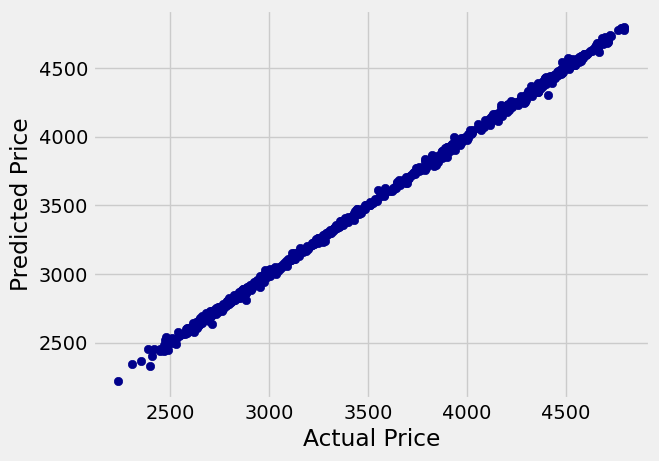

In [54]:
plt.scatter(Psp.Actual_Price, Psp.Predicted_Price,  color='Darkblue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


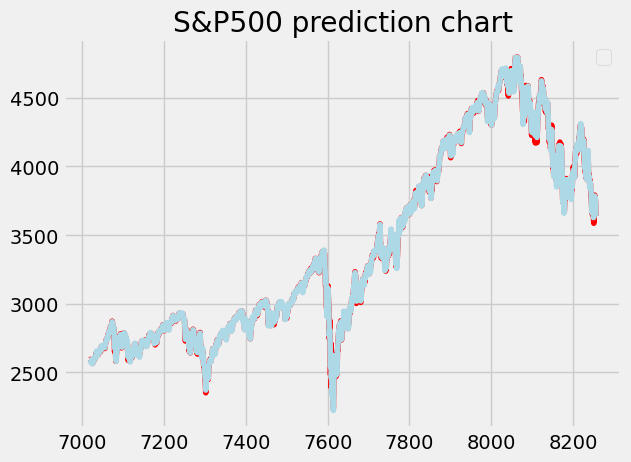

In [55]:
plt.plot(Psp.Actual_Price, color='red')
plt.plot(Psp.Predicted_Price, color='lightblue')
plt.title("S&P500 prediction chart")
plt.legend();

# RandomForest Regressor

In [99]:
from sklearn.ensemble import RandomForestRegressor

In [100]:
Psp = RandomForestRegressor(n_estimators=150, random_state=1, min_samples_leaf=2)

# Train 
Psp.fit(test_x, test_y)

# Predict
closing_price_pred_Psp = Psp.predict(test_x)

# Calculate the absolute errors and MAPE
errors_Psp = abs(closing_price_pred_Psp - test_y)
mape_Psp = 100 * (errors_Psp / test_y)

# MAE
mae_Psp = round(np.mean(errors_Psp), 2)

# Accuracy
accuracy_Psp = 100 - np.mean(mape_Psp)

print("-----------------\nRandom Forest\n-----------------")
print("MAE: ", mae_Psp, "degrees")
print('Accuracy:', round(accuracy_Psp, 2), '%.')

-----------------
Random Forest
-----------------
MAE:  6.31 degrees
Accuracy: 99.81 %.


In [147]:
Psp1=pd.DataFrame({'Actual_Price':test_y, 'closing_price_pred_Psp':predicted})
Psp1.head(10)

Actual_Price  closing_price_pred_Psp
7017   2587.840088             2583.547373
7018   2591.129883             2591.191668
7019   2590.639893             2590.294468
7020   2594.379883             2591.712327
7021   2584.620117             2572.306307
7022   2582.300049             2579.695589
7023   2584.840088             2584.687511
7024   2578.870117             2570.599258
7025   2564.620117             2562.977421
7026   2585.639893             2588.031932

In [149]:
Psp1.describe()

Actual_Price  closing_price_pred_Psp
count   1239.000000             1239.000000
mean    3404.454907             3404.707353
std      681.904410              681.987886
min     2237.399902             2222.209406
25%     2809.734985             2809.963533
50%     3168.570068             3170.004257
75%     4057.750000             4057.813688
max     4796.560059             4793.935536

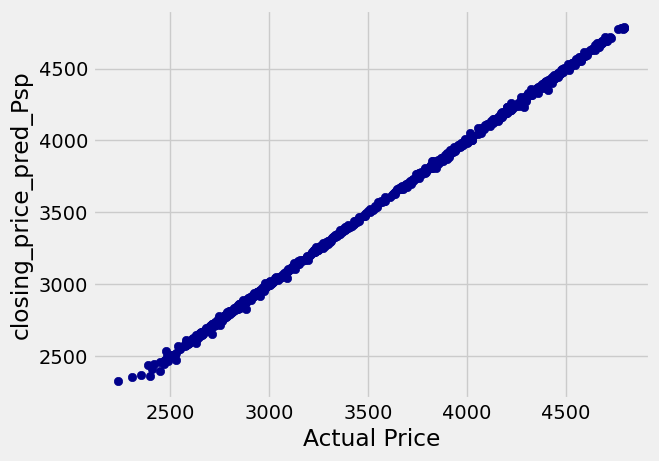

In [150]:
plt.scatter(Psp.Actual_Price, closing_price_pred_Psp,  color='Darkblue')
plt.xlabel("Actual Price")
plt.ylabel("closing_price_pred_Psp")
plt.show()